<a href="https://colab.research.google.com/github/srodriguez5500/Easy-Visa/blob/main/DSBA_Project_ET_EasyVisa_Fullcode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EasyVisa Project

## Context:

Business communities in the United States are facing high demand for human resources, but one of the constant challenges is identifying and attracting the right talent, which is perhaps the most important element in remaining competitive. Companies in the United States look for hard-working, talented, and qualified individuals both locally as well as abroad.

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on their wages or working conditions by ensuring US employers' compliance with statutory requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

OFLC processes job certification applications for employers seeking to bring foreign workers into the United States and grants certifications in those cases where employers can demonstrate that there are not sufficient US workers available to perform the work at wages that meet or exceed the wage paid for the occupation in the area of intended employment.

## Objective:

In FY 2016, the OFLC processed 775,979 employer applications for 1,699,957 positions for temporary and permanent labor certifications. This was a nine percent increase in the overall number of processed applications from the previous year. The process of reviewing every case is becoming a tedious task as the number of applicants is increasing every year.

The increasing number of applicants every year calls for a Machine Learning based solution that can help in shortlisting the candidates having higher chances of VISA approval. OFLC has hired your firm EasyVisa for data-driven solutions. You as a data scientist have to analyze the data provided and, with the help of a classification model:

* Facilitate the process of visa approvals.
* Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status.


## Data Description

The data contains the different attributes of the employee and the employer. The detailed data dictionary is given below.

* case_id: ID of each visa application
* continent: Information of continent the employee
* education_of_employee: Information of education of the employee
* has_job_experience: Does the employee has any job experience? Y= Yes; N = No
* requires_job_training: Does the employee require any job training? Y = Yes; N = No
* no_of_employees: Number of employees in the employer's company
* yr_of_estab: Year in which the employer's company was established
* region_of_employment: Information of foreign worker's intended region of employment in the US.
* prevailing_wage:  Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment.
* unit_of_wage: Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.
* full_time_position: Is the position of work full-time? Y = Full Time Position; N = Part Time Position
* case_status:  Flag indicating if the Visa was certified or denied

## **Importing necessary libraries and data**

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [ ]:
#Suppress warnings
import warnings
warnings.filterwarnings('ignore')

#Read and manipulate data
import numpy as np
import pandas as pd

#Data visualization
import matplotlib.pyplot as plt
from matplotlib.pyplot import subplots_adjust
import seaborn as sns
sns.set()

#Show graphs inline
%matplotlib inline

#Show all columns
pd.set_option('display.max_columns', None)
#Set number of displayed rows
pd.set_option('display.max_rows', 200)
#Restrict float values to 3 decimal places
pd.set_option('display.float_format', lambda x: '%.3f' % x)

#Split data into training and test sets
from sklearn.model_selection import train_test_split


#Build different ensemble classifiers
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
    StackingClassifier
)

from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.linear_model import LogisticRegression

#For hypertuning models
from sklearn.model_selection import GridSearchCV

#Evaluate model performance
from sklearn import metrics

from sklearn.metrics import (
    recall_score,
    f1_score,
    accuracy_score,
    precision_score,
    confusion_matrix
)

## **Data Overview**

###**Observations/Sanity Checks**

####**Import dataset and display first/last 5 rows.**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Import dataset
df = pd.read_csv('/content/drive/MyDrive/UT Austin Data Analytics Files/Projects/Project 5 - Easy Visa Ensemble Methods; Bagging and Boosting/EasyVisa.csv')

In [ ]:
#Make a copy of dataset to preserve original copy
df1 = df.copy()

In [ ]:
#Show first 5 rows
df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.203,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.650,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.860,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.030,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.390,Year,Y,Certified


In [ ]:
#Show last 5 rows
df.tail()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.570,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.790,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.850,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.770,Year,Y,Certified
25479,EZYV25480,Asia,Bachelor's,Y,N,3195,1960,Midwest,70876.910,Year,Y,Certified


- The dataset was successfully imported.

#### **Check data shape and data types**

In [ ]:
df.shape

(25480, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


- There are 25,480 observations in the data set and 12 features.
- Many features are of the data type "object" due to their categorical nature.
- Numerical features include year of establishment (int64), number of employees (int64) and prevailing wage (float64).

####**Check for missing values**

In [ ]:
df.isnull().sum()

,0
case_id,0
continent,0
education_of_employee,0
has_job_experience,0
requires_job_training,0
no_of_employees,0
yr_of_estab,0
region_of_employment,0
prevailing_wage,0
unit_of_wage,0


- No missing values detected.

####**Check for duplicates**

In [ ]:
df.duplicated().sum()

0

- No duplicate rows are present.

####**Statistical summary of numerical features**

In [ ]:
#Statistical summary for numerical features
df.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_employees,25480.000,5667.043,22877.929,-26.000,1022.000,2109.000,3504.000,602069.000
yr_of_estab,25480.000,1979.410,42.367,1800.000,1976.000,1997.000,2005.000,2016.000
prevailing_wage,25480.000,74455.815,52815.942,2.137,34015.480,70308.210,107735.513,319210.270


- There are negative entries for the no_of_employees feature, which could be a mistake or could indicate the number of employees needed. We will further explore this in the EDA and data preprocessing sections.
- There appears to be outliers in the number of employees feature, given that at least 75% of companies have 3,504 employees and the maximum number of employees is 602,069.
- The earliest establishment of a company was in 1800 and the most recent is 2016.
- Prevailing wage has a large range of values from \$2.14 - \$319,210.27. The interpretation of these values is dependent upon their respective unit of wage and possibly, full-time position status.


####**Summary of categorical features**

In [ ]:
#Show value count and proportion of each unique entry in every categorical feature
cat_cols = df.select_dtypes(include = ['object']).columns

for col in cat_cols:
  feature_count = df[col].value_counts()
  feature_proportion = df[col].value_counts(normalize=True)
  print(pd.merge(feature_count, feature_proportion, on=col, how='inner'))
  print('-'*40)

           count  proportion
case_id                     
EZYV01         1       0.000
EZYV16995      1       0.000
EZYV16993      1       0.000
EZYV16992      1       0.000
EZYV16991      1       0.000
...          ...         ...
EZYV8492       1       0.000
EZYV8491       1       0.000
EZYV8490       1       0.000
EZYV8489       1       0.000
EZYV25480      1       0.000

[25480 rows x 2 columns]
----------------------------------------
               count  proportion
continent                       
Asia           16861       0.662
Europe          3732       0.146
North America   3292       0.129
South America    852       0.033
Africa           551       0.022
Oceania          192       0.008
----------------------------------------
                       count  proportion
education_of_employee                   
Bachelor's             10234       0.402
Master's                9634       0.378
High School             3420       0.134
Doctorate               2192       0.086
-----

- Levels of education of the applicants include Highschool, Bachelor's, Master's and Doctorate.
- Units of wage include yearly, hourly, weekly and monthly.
- Categorical variables will be thoroughly investigated in the EDA section.

## **Exploratory Data Analysis (EDA)**

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

###**Univariate analysis**

####**Univariate analysis on numerical predictors**

In [ ]:
#For a single, numerical variable, the following function will generate boxplots (one with and one without outliers) and histograms (one with and one without kde)
def boxplots_hist_1var(data, x):
    #Calculate mean and median for the predictor
    mean = df[x].mean()
    median = df[x].median()

    #Set grid size
    fig, axs = plt.subplots(2,2, figsize=(12,10))

    #Generate a boxplot for x
    axs[0, 0].set_title(f'Boxplot for "{x}"')
    sns.boxplot(data=data, x=x, ax=axs[0,0], color='teal')
    axs[0,0].axvline(mean, linestyle='--', color='r', label=f'Mean: {mean}')
    axs[0,0].axvline(median, linestyle='-', color='g', label=f'Median: {median}')

    #Generate a boxplot with outliers for x
    axs[0, 1].set_title(f'Boxplot for "{x}" without Outliers')
    sns.boxplot(data=data, x=x, showfliers=False, ax=axs[0,1], color='orange')
    axs[0,1].axvline(mean, linestyle='--', color='r', label=f'Mean: {mean:.2f}')
    axs[0,1].axvline(median, linestyle='-', color='g', label=f'Median: {median:.2f}')
    axs[0,1].legend()

    #Generate histogram
    axs[1, 0].set_title(f'Distribution of "{x}"')
    sns.histplot(data=data, x=x, ax=axs[1,0], color='teal')

    #Generate histogram with kde
    axs[1, 1].set_title(f'Distribution with KDE of "{x}"')
    sns.histplot(data=data, x=x, ax=axs[1,1], color='orange', kde=True)

    plt.tight_layout()
    plt.show()

**Observations on `no_of_employees`**

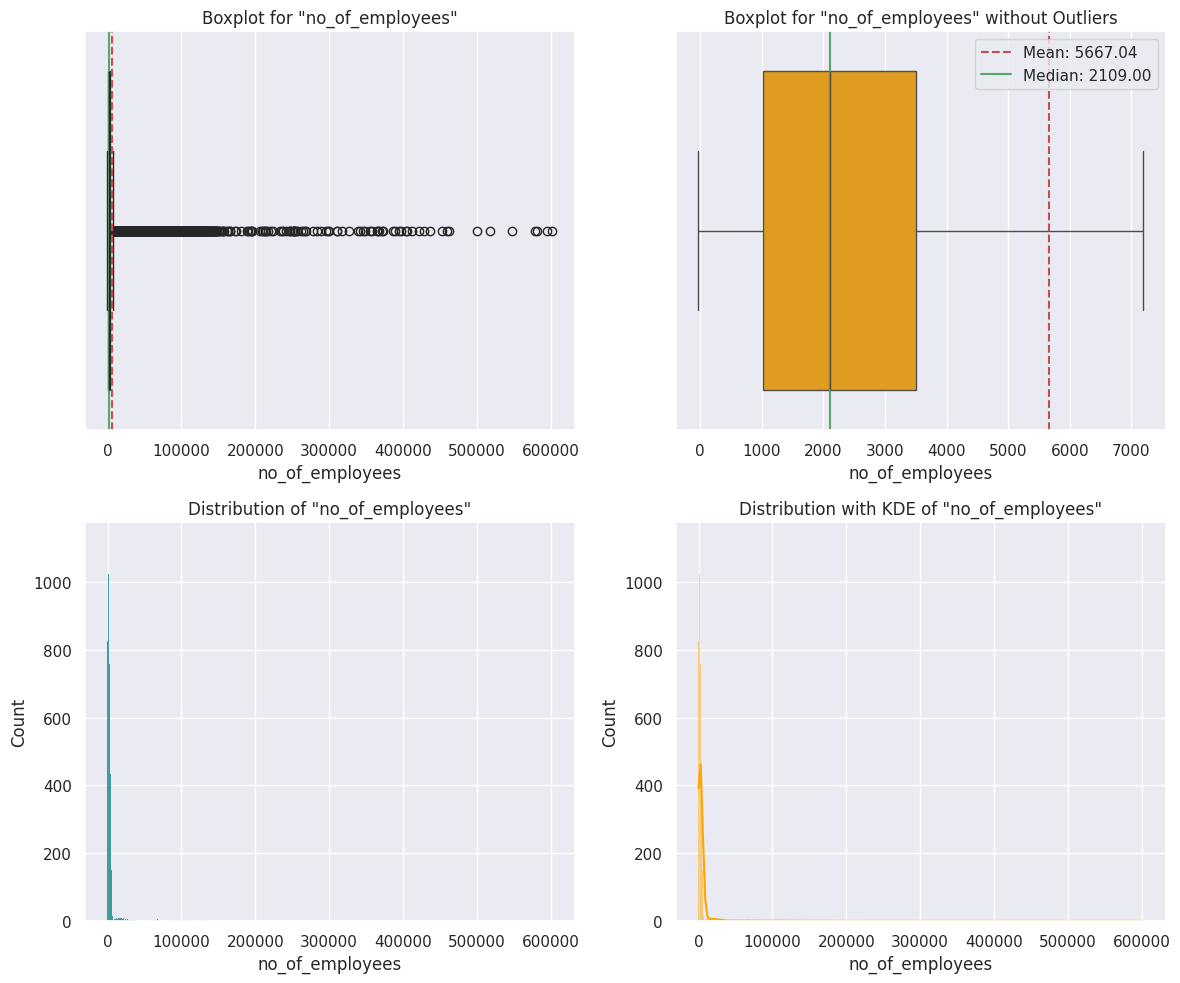

In [ ]:
boxplots_hist_1var(df, 'no_of_employees')

In [ ]:
#Calculate max value of _no_of_employees
print('Maximum number of employees: ', df['no_of_employees'].max())
#Calculate minimum value of no_of_employees
print('Minimum number of employees: ', df['no_of_employees'].min())

Maximum number of employees:  602069
Minimum number of employees:  -26


In [ ]:
#Calculate how many observations are <= 0
emp_less_eq_0 = df[df['no_of_employees'] <= 0]
emp_less_eq_0.shape

(33, 12)

In [ ]:
#Display rows with entries <= 0 for no_of_employees
emp_less_eq_0

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
245,EZYV246,Europe,Master's,N,N,-25,1980,Northeast,39452.990,Year,Y,Certified
378,EZYV379,Asia,Bachelor's,N,Y,-11,2011,Northeast,32506.140,Year,Y,Denied
832,EZYV833,South America,Master's,Y,N,-17,2002,South,129701.940,Year,Y,Certified
2918,EZYV2919,Asia,Master's,Y,N,-26,2005,Midwest,112799.460,Year,Y,Certified
6439,EZYV6440,Asia,Bachelor's,N,N,-14,2013,South,103.970,Hour,Y,Denied
6634,EZYV6635,Asia,Bachelor's,Y,N,-26,1923,West,5247.320,Year,Y,Denied
7224,EZYV7225,Europe,Doctorate,N,N,-25,1998,Midwest,141435.950,Year,Y,Certified
7281,EZYV7282,Asia,High School,N,N,-14,2000,Midwest,58488.500,Year,Y,Denied
7318,EZYV7319,Asia,Bachelor's,Y,Y,-26,2006,South,115005.610,Year,Y,Certified
7761,EZYV7762,Asia,Master's,N,N,-11,2009,Midwest,38457.510,Year,Y,Certified


- There are many extreme values present in no_of_employees. The entries range from -26 - 602,069.
- No patterns were detected with the negative entries. They could represent the number of employees needed but nevertheless, these values will be treated in the preprocessing section since they add no value to the analysis.
- At least 75% of the employers have less than or equal to 3,504 employees at their company.

**Observations on `prevailing_wage`**

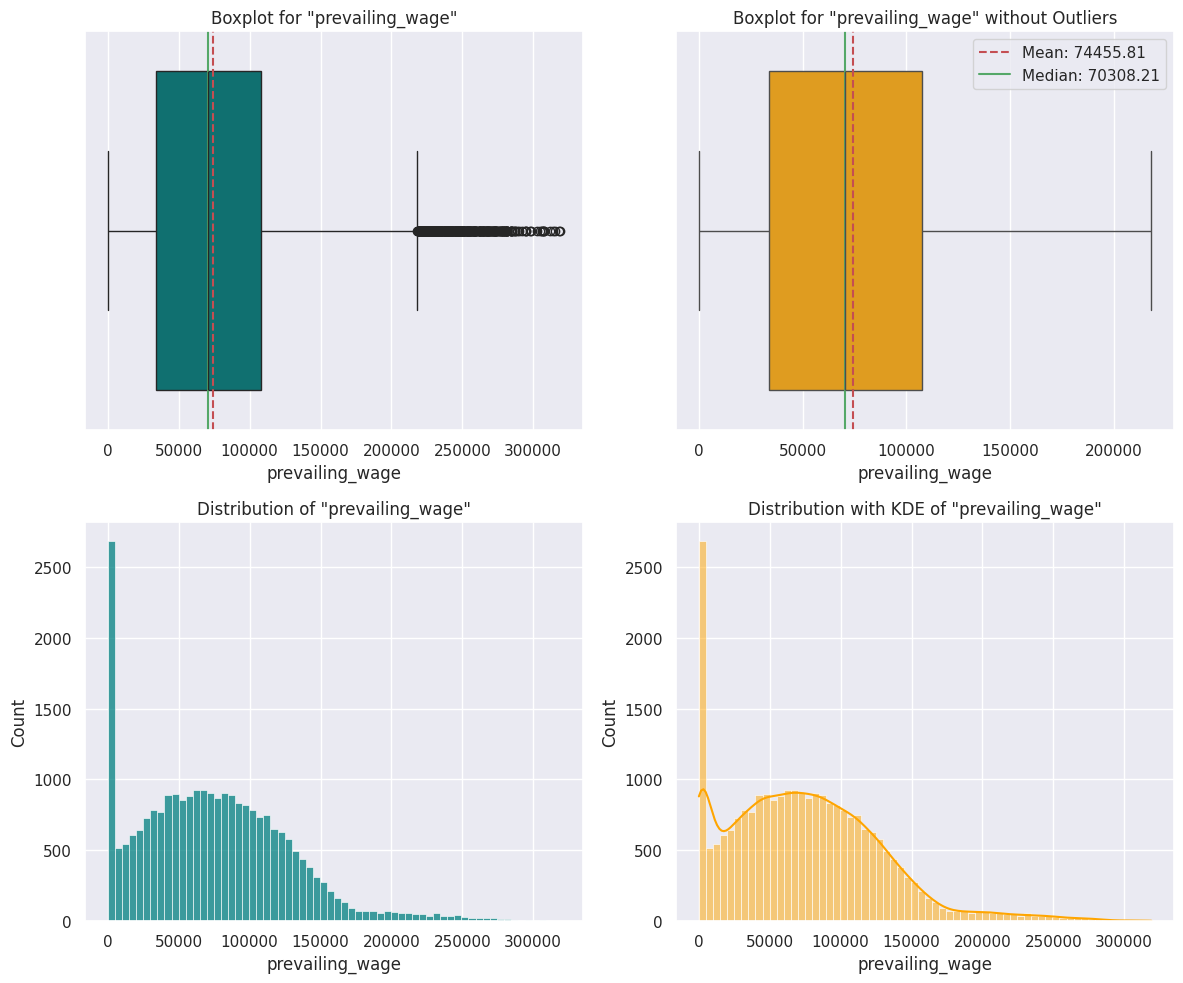

In [ ]:
boxplots_hist_1var(df, 'prevailing_wage')

In [ ]:
#pull row with the lowest prevailing wage
min_wage_row = df[df['prevailing_wage'] == df['prevailing_wage'].min()]
#pull row with the highest prevailing wage
max_wage_row = df[df['prevailing_wage'] == df['prevailing_wage'].max()]

print(f'The minimum prevailing wage is {min_wage_row["prevailing_wage"].iloc[0]} at a unit wage of "{min_wage_row["unit_of_wage"].iloc[0]}"')
print(f'The maximum prevailing wage is {max_wage_row["prevailing_wage"].iloc[0]} at a unit wage of "{max_wage_row["unit_of_wage"].iloc[0]}"')

The minimum prevailing wage is 2.1367 at a unit wage of "Hour"
The maximum prevailing wage is 319210.27 at a unit wage of "Year"


- The data is slightly right skewed and has many outliers present. This is likely due to the varying units of wage.
- The prevailing wage values range from \$2.14 (hourly) - \$319,210.27 (annually).
- 75% of the prevailing wages are less than or equal to ~$110,000.

**Observations on `yr_of_estab`**

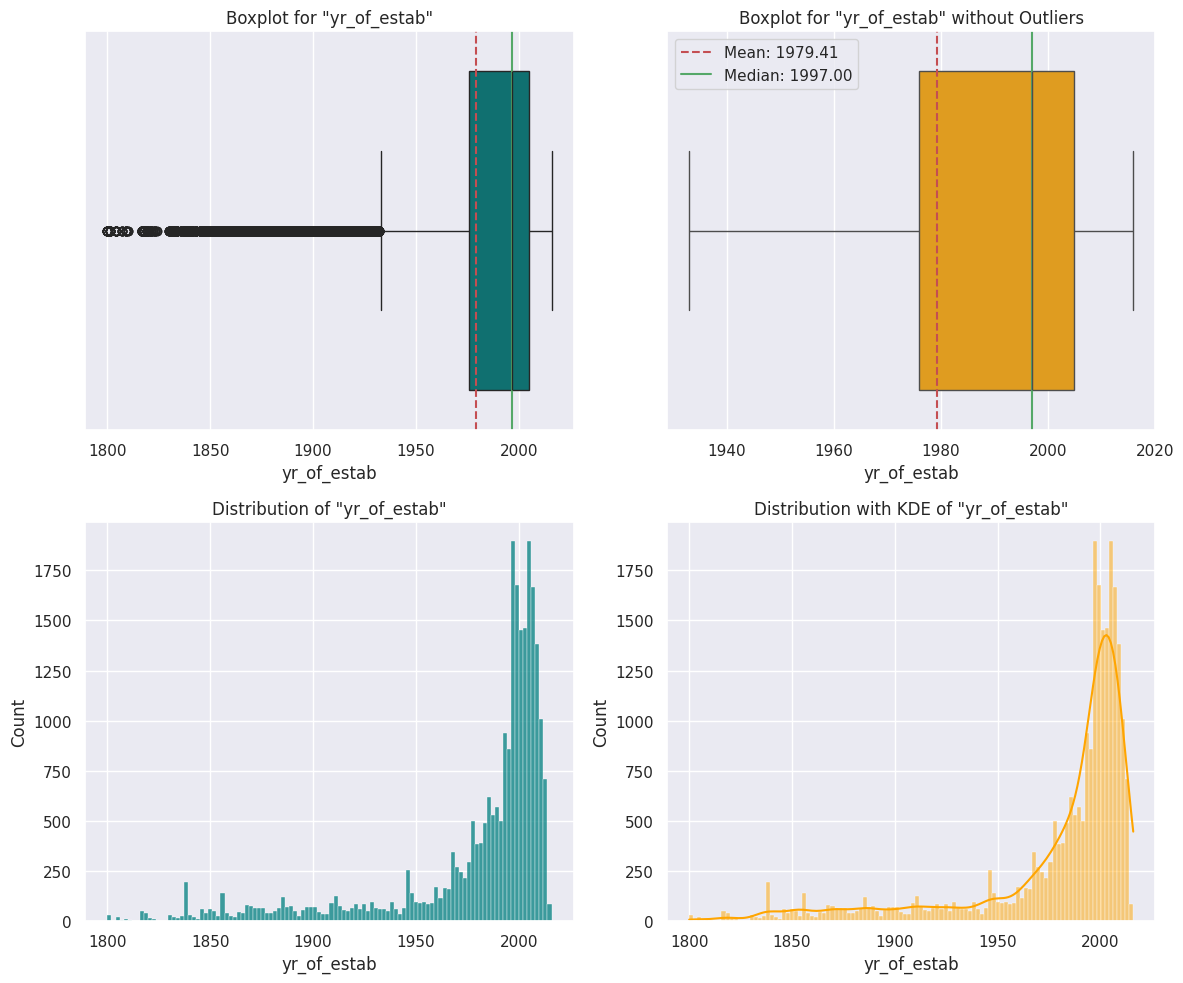

In [ ]:
boxplots_hist_1var(df, 'yr_of_estab')

In [ ]:
#Minimum year of establishment
min_yr_of_estab = df['yr_of_estab'].min()
#Maximum year of establishment
max_yr_of_estab = df['yr_of_estab'].max()
print(f'Min year of establishment: {min_yr_of_estab} \nMax year of establishment: {max_yr_of_estab}')

Min year of establishment: 1800 
Max year of establishment: 2016


- The data is heavily left skewed and the data seems to cluster around the year 2000. This indicates that more newly established companies make up the majority of employers that are requesting foreign workers.
- The earliest companies were established in 1800 and the oldest companies were established in 2016.
- Many outliers are present.

####**Univariate analysis on categorical predictors**

In [ ]:
#create a user defined function that will generate a countplot for categorical data
def count_plot(df, predictor, title):

  #set plot size
  plt.figure(figsize=(7,5))

  #create the count plot
  ax = sns.countplot(data=df, x=predictor, palette='Paired', order=df[predictor].value_counts(ascending=False).index)

  #add title
  plt.title(title, fontsize=16)

  #label axes
  plt.xlabel(predictor, fontsize=14)
  plt.ylabel('Count', fontsize=14)

  #rotate x-axis labels
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

  #calculate percentage and annotate
  total = len(df)
  for p in ax.patches:
    count = p.get_height()
    percentage = f'{(count / total) * 100:.2f}%'
    x = p.get_x() + p.get_width() / 2
    y = count
    ax.annotate(percentage, (x,y), ha='center', va='bottom')

**Observations on `continent`**

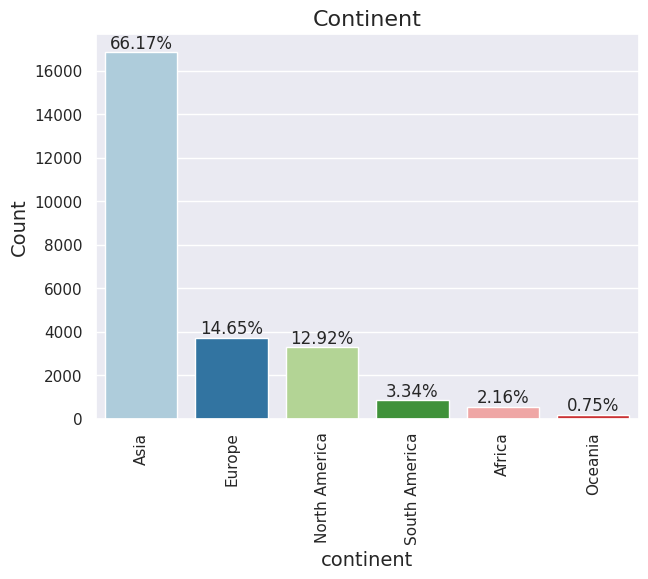

In [ ]:
count_plot(df, 'continent', 'Continent')

- The majority of employees requested are from Asia, followed by Europe and North America.
- The continent with the least number of foreign workers requested is Oceania.

**Observations on `education_of_employee`**

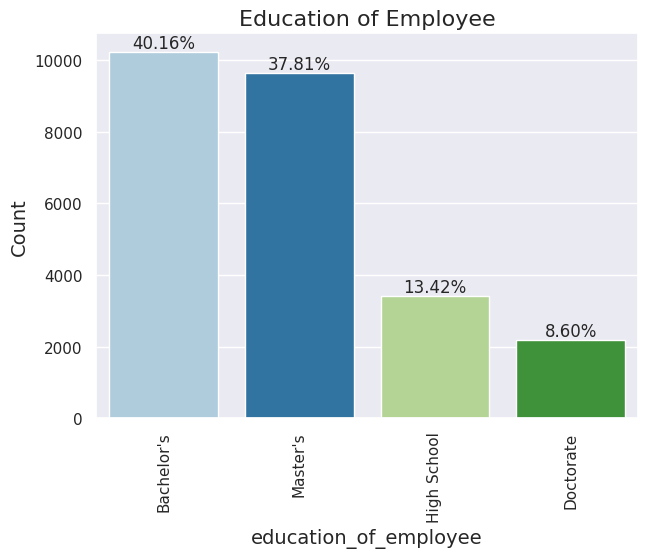

In [ ]:
count_plot(df, 'education_of_employee', 'Education of Employee')

-  Employees with Bachelor's and Master's degrees are the highest in demand.

**Observations on `has_job_experience`**

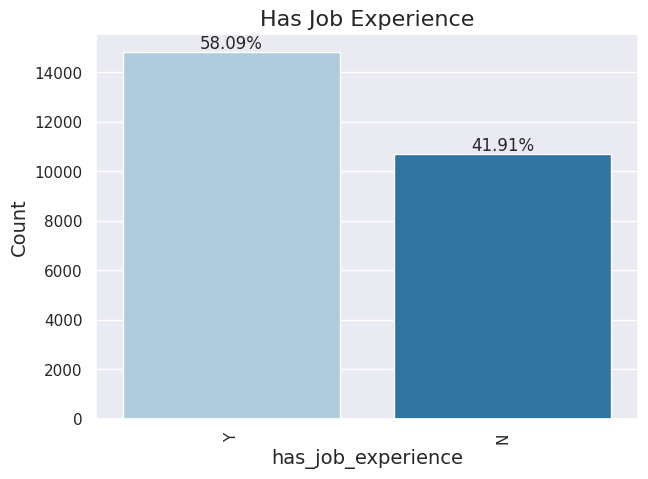

In [ ]:
count_plot(df, 'has_job_experience', 'Has Job Experience')

- 58% of the employees requested have job experience.

**Observations on `requires_job_training`**

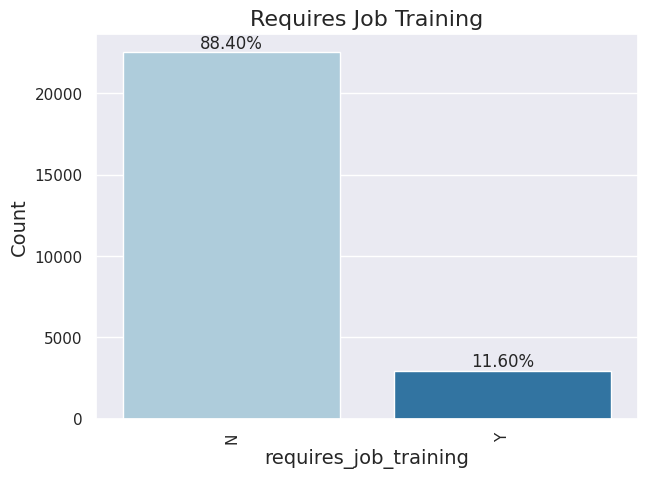

In [ ]:
count_plot(df, 'requires_job_training', 'Requires Job Training')

- 88% of the employees do not require job training. This is interesting because 42% of the employees do not have job experience. The way these features are related is to be further explored with respect to case status.

**Observations on `region_of_employment`**

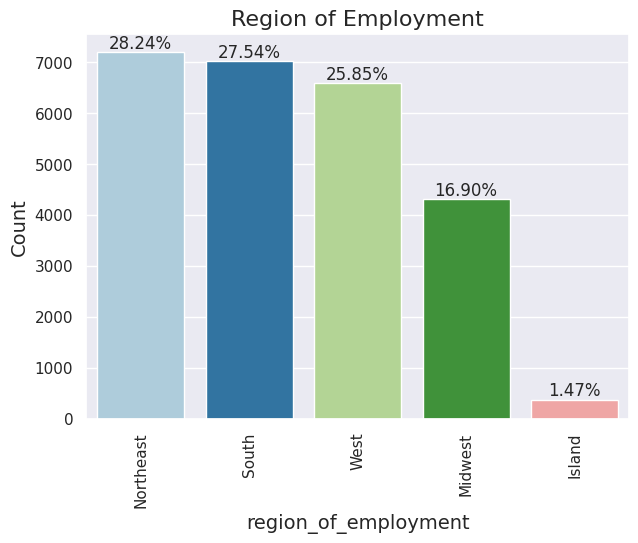

In [ ]:
count_plot(df, 'region_of_employment', 'Region of Employment')

- The demand for foreign workers is evenly spread between Northeast, Southern and Western regions.
- The Island region has the lowest demand for foreign workers.

**Observations on `unit_of_wage`**

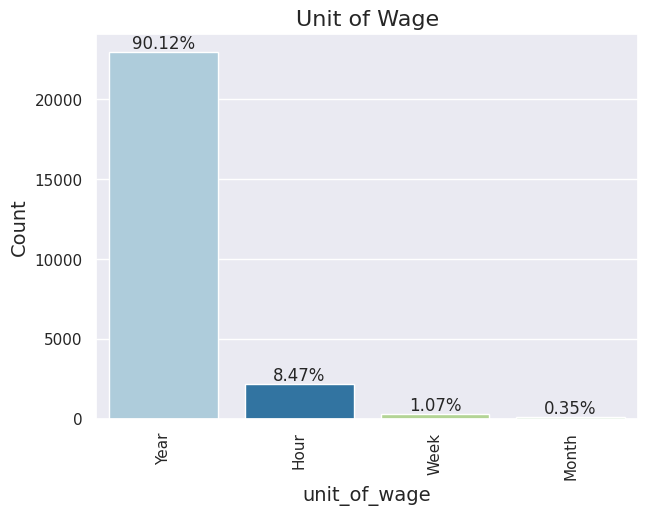

In [ ]:
count_plot(df, 'unit_of_wage', 'Unit of Wage')

- The majority of prevailing wages have a yearly unit of wage.

**Observations on `full_time_position`**

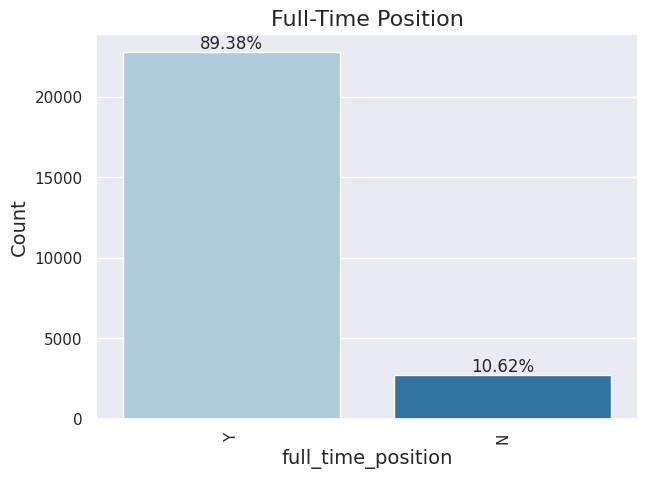

In [ ]:
count_plot(df, 'full_time_position', 'Full-Time Position')

- 89% of the applications are for full time positions.

**Observations on `case_status`**

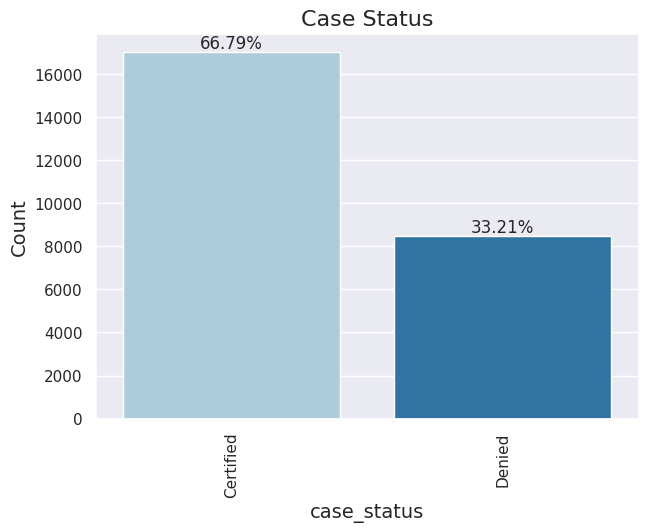

In [ ]:
count_plot(df, 'case_status', 'Case Status')

- The data is slightly imbalanced where 67% of the cases were certified and 33% were not.

###**Multivariate analysis**

####**We will use the following functions to perform the multivariate analysis.**

In [ ]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """


    #Group data by predictor and target and get the size of each group
    predictor_target_counts = df.groupby([predictor, target]).size().reset_index(name='counts')

    #Pivot the table to have the predictor as rows and target as columns
    predictor_target_table = predictor_target_counts.pivot(index=predictor, columns=target, values='counts')

    #Calculate the total observations for each predictor
    predictor_target_table['Total'] = predictor_target_table.sum(axis=1)

    #Calculate the percentage of each target
    predictor_target_table['Percentage'] = (predictor_target_table['Total'] / predictor_target_table['Total'].sum()) * 100

    #Display the table
    print(predictor_target_table)

    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]

    tab = pd.crosstab(data[predictor], data[target], normalize='index').sort_values(
        by=sorter, ascending=False
    )

    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5), color=['#ff7f0e','#1f77b4'])
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [ ]:
#Function to plot distributions wrt target
def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="colorblind")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="colorblind",
    )

    plt.tight_layout()
    plt.show()

- First, we will check for linear correlations among numerical variables.

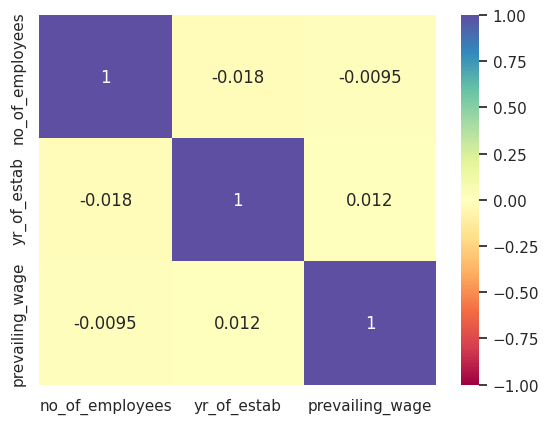

In [ ]:
#generate a heatmap
sns.heatmap(df.corr(numeric_only=True), vmin=-1, vmax=1, cmap='Spectral', fmt='.2g', annot=True);

- No linear relationships are present among numerical features.

#### **Compare features with respect to target variable**

**`no_of_employees vs case_status`**

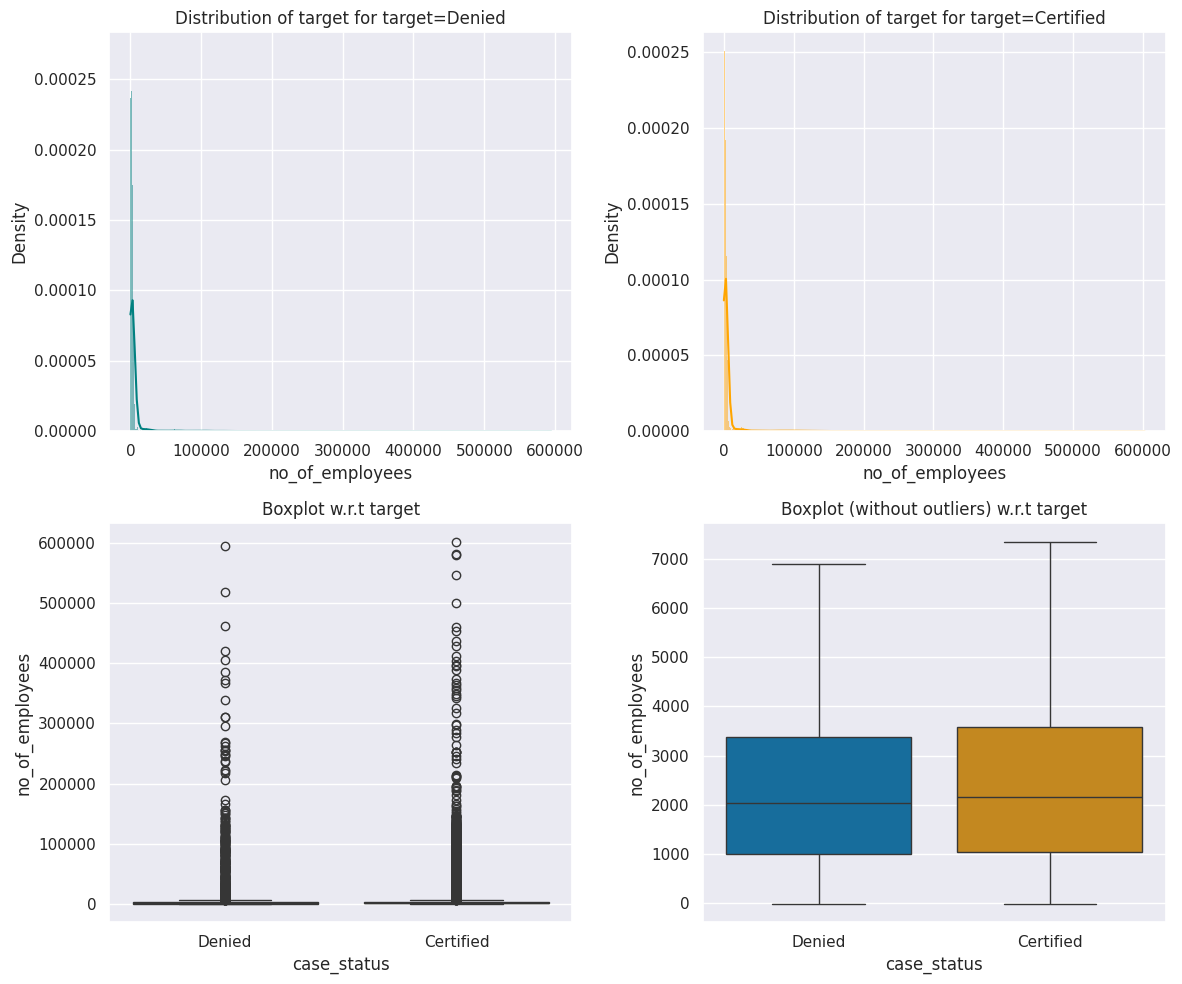

In [ ]:
distribution_plot_wrt_target(df, 'no_of_employees', 'case_status')

- The distribution of the number of employees for certified and denied cases are very similar.
- Certified cases have a slightly higher median number of employees, in comparison to denied cases.

**`prevailing_wage vs case_status`**
- **The US government has established a prevailing wage to protect local talent and foreign workers. How does the visa status change with the prevailing wage?**

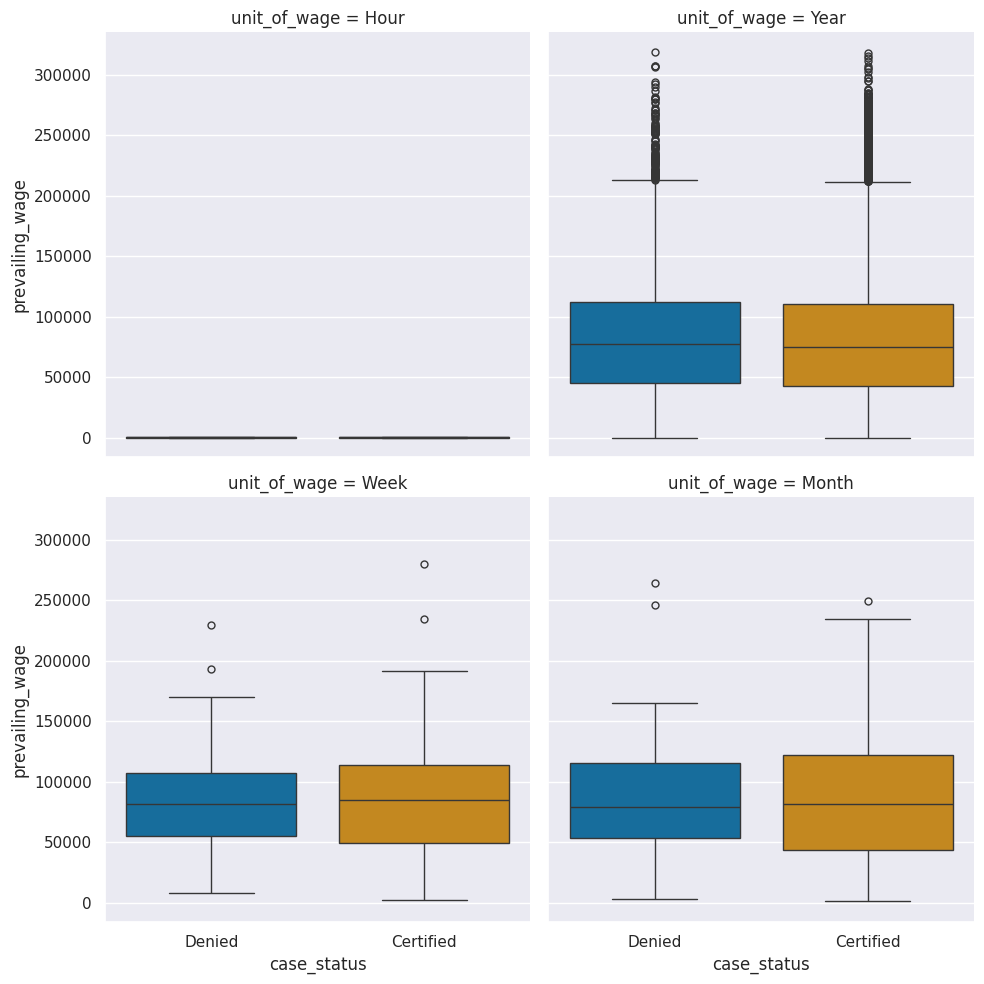

In [ ]:
sns.catplot(data=df, x='case_status', y='prevailing_wage', hue='case_status', col='unit_of_wage', kind='box', col_wrap=2, palette='colorblind');

- No major patterns are detected between prevailing wage and case status.
- Certified cases have slightly higher prevailing wages for weekly and monthly units of wage, compared to cases that were denied.
- Some observations seem improbable such as positions paying \$230,000 each week or \$250,000 per month.
- Let us further explore prevailing wages, separated by unit of wage in the next section.

**Variance in `prevailing_wages`**

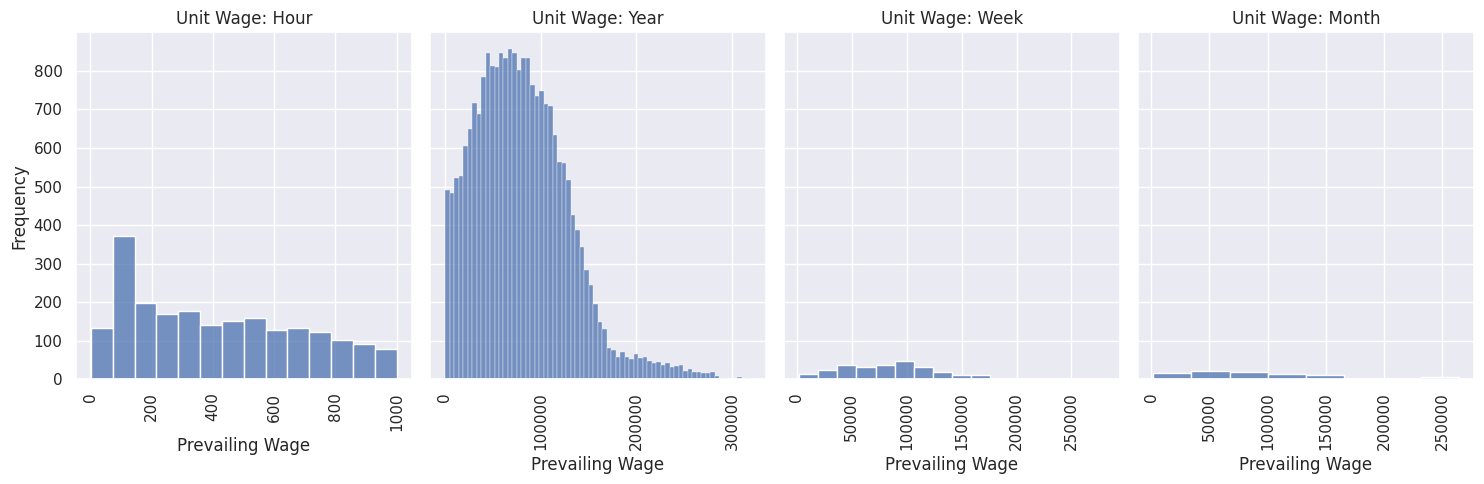

In [ ]:
#Identify unique values of unit_of_wage
unique_units = df['unit_of_wage'].unique()

#Set up a grid for subplots
fig, axes = plt.subplots(1, len(unique_units), figsize=(15, 5), sharey=True)

#Loop through each unique unit of wage and plot histogram
for i, unit in enumerate(unique_units):
  sub_df = df[df['unit_of_wage'] == unit]

  #Plot histogram
  sns.histplot(data=sub_df, x='prevailing_wage', ax=axes[i])
  axes[i].set_title(f'Unit Wage: {unit}');
  axes[i].set_xlabel('Prevailing Wage')
  axes[i].set_ylabel('Frequency')
  axes[i].tick_params(axis='x', rotation=90)
#Adjust layout
plt.tight_layout()

In [ ]:
#Group by 'unit_of_wage' and calculate min/max of 'prevailing_wage'
wage_stats = df.groupby('unit_of_wage')['prevailing_wage'].agg(['min', 'max'])
print(wage_stats)

                  min        max
unit_of_wage                    
Hour            2.137    999.919
Month        1599.280 264362.950
Week         2183.230 280175.950
Year          100.000 319210.270


In [ ]:
df['unit_of_wage'].value_counts(normalize=True)

,proportion
unit_of_wage,
Year,0.901
Hour,0.085
Week,0.011
Month,0.003


- There is a wide range of values for prevailing wages with respect to unit of wage. More unreasonble values have been discovered, including prevailing wages of \$999 per hour, \$100 per year and \$280,175.95 per week.
- Since annual unit of wage makes up 90% of the data, we will focus on the accuracy of that unit of wage first.
- It is highly unlikely that a full time position will pay a yearly salary of \$10,000 or less so we will pull observations that meet this criteria to review the accuracy.

In [ ]:
annual = df[df['unit_of_wage']=='Year']
annual_lt_10000 = annual[annual['prevailing_wage'] <= 10000]
print('For Jobs Paying <= $10,000 Per Year:')
print(annual_lt_10000['full_time_position'].value_counts(normalize=True))

For Jobs Paying <= $10,000 Per Year:
full_time_position
Y   0.959
N   0.041
Name: proportion, dtype: float64


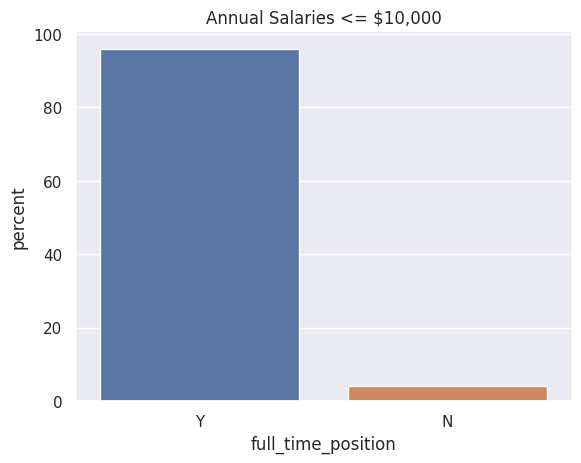

In [ ]:
sns.countplot(data=annual_lt_10000, x='full_time_position', hue='full_time_position', stat='percent')
plt.title('Annual Salaries <= $10,000');

In [ ]:
annual_lt_10000.shape[0] / df.shape[0]

0.04073783359497645

- The data shows that 95% of the positions that pay an annual salary of \$10,000 or less are full time. This is highly unlikely and could indicate an error in the observations.
- Moreover, these observations make up close to 4% of all observations.
- Let us explore the rest of the categories for units of wage to further determine their accuracy.

In [ ]:
#Randomly pull 5 rows with unit of wage = "Hour" and review full time position status and prevailing wage
df[df['unit_of_wage'] == 'Hour'].sample(n=5, random_state=42)

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
9231,EZYV9232,Asia,High School,Y,N,1270,2005,Northeast,470.630,Hour,Y,Denied
19964,EZYV19965,Asia,Bachelor's,Y,N,78,1963,South,357.027,Hour,Y,Denied
22084,EZYV22085,North America,Bachelor's,Y,N,-14,1980,West,691.061,Hour,Y,Denied
19747,EZYV19748,Asia,Bachelor's,N,N,830,2008,Northeast,441.435,Hour,Y,Certified
6100,EZYV6101,Asia,Bachelor's,N,N,1797,1992,Northeast,249.916,Hour,Y,Denied


In [ ]:
#Randomly pull 5 rows with unit of wage = "week" and review full time position status and prevailing wage
df[df['unit_of_wage'] == 'Week'].sample(n=5, random_state=42)

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
2927,EZYV2928,Asia,Master's,Y,N,2005,1889,South,35368.290,Week,Y,Certified
10453,EZYV10454,Asia,Master's,N,N,278152,1970,West,36691.210,Week,Y,Certified
6983,EZYV6984,South America,Master's,Y,N,2455,2001,Northeast,122239.880,Week,Y,Certified
11487,EZYV11488,North America,Master's,Y,N,2193,1969,Northeast,66487.690,Week,Y,Denied
18719,EZYV18720,North America,Bachelor's,N,N,1363,1998,West,97222.120,Week,Y,Denied


In [ ]:
#Randomly pull 5 rows with unit of wage = "Month" and review full time position status and prevailing wage
df[df['unit_of_wage'] == 'Month'].sample(n=5, random_state=42)

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
12081,EZYV12082,Asia,Bachelor's,N,N,2289,1919,South,8264.220,Month,Y,Denied
15228,EZYV15229,Asia,Master's,Y,N,14544,1985,South,53314.500,Month,Y,Certified
9330,EZYV9331,North America,Master's,Y,N,955,1978,Midwest,121838.730,Month,Y,Denied
2534,EZYV2535,Asia,Bachelor's,N,N,2975,2012,Northeast,113609.510,Month,Y,Denied
14385,EZYV14386,Asia,Master's,Y,N,2844,2011,South,140501.710,Month,Y,Certified


- More illogical values for prevailing wage have been found, including:
  - A full time position paying \$691.06 per hour.
  - A full time position offering \$36,691 per week to a candidate that requires no job training and has no job experience.
  - A full time position offering \$113,609.51 per month to a candidate that requires no job training and has no job experience.
- Due to the unlikelihood of the mentioned observations, the prevailing_wage feature will be dropped in the data pre-processing section.

**`yr_of_estab vs case_status`**

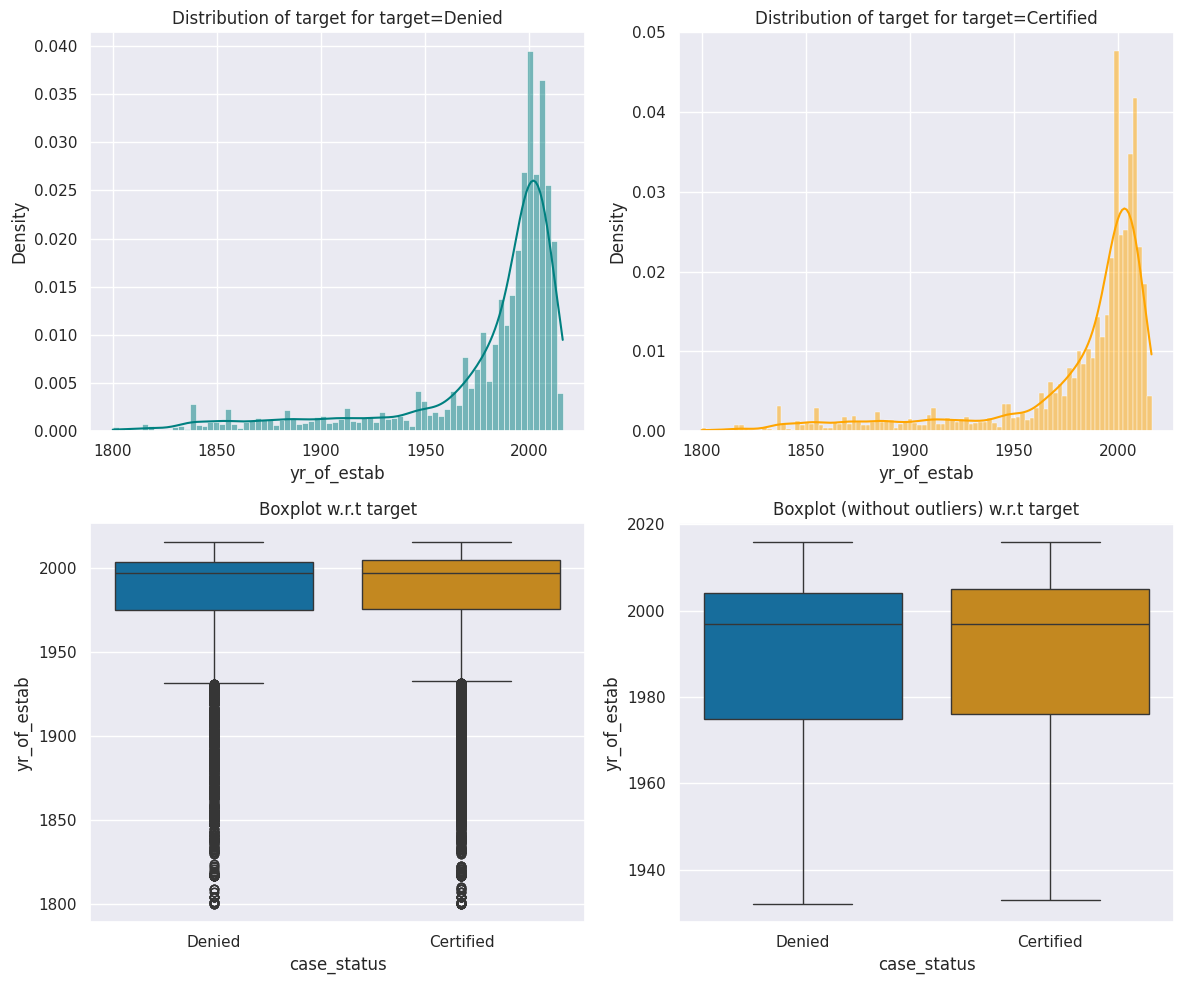

In [ ]:
distribution_plot_wrt_target(df, 'yr_of_estab', 'case_status')

- The distribution for certified and denied cases are very similar, with respect to year of establishment.

**`continent vs case_status`**
- **How does the visa status vary across different continents?**

case_status    Certified  Denied  Total  Percentage
continent                                          
Africa               397     154    551       2.162
Asia               11012    5849  16861      66.173
Europe              2957     775   3732      14.647
North America       2037    1255   3292      12.920
Oceania              122      70    192       0.754
South America        493     359    852       3.344


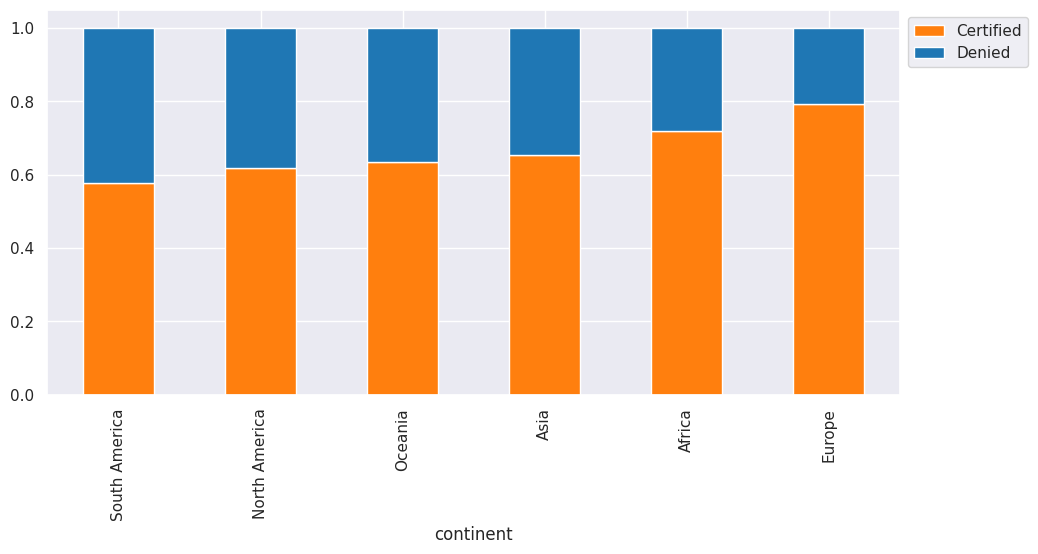

In [ ]:
stacked_barplot(df, 'continent', 'case_status')

- South America has the highest denial rate at 42%, compared to all other continents and makes up about 3% of all applications.
- Africa and Europe have the lowest denial rates and cumulatively, make up about 17% of all applications.

**`education_of_employee vs case_status`**
- **Those with higher education may want to travel abroad for a well-paid job. Does education play a role in Visa certification?**

case_status            Certified  Denied  Total  Percentage
education_of_employee                                      
Bachelor's                  6367    3867  10234      40.165
Doctorate                   1912     280   2192       8.603
High School                 1164    2256   3420      13.422
Master's                    7575    2059   9634      37.810


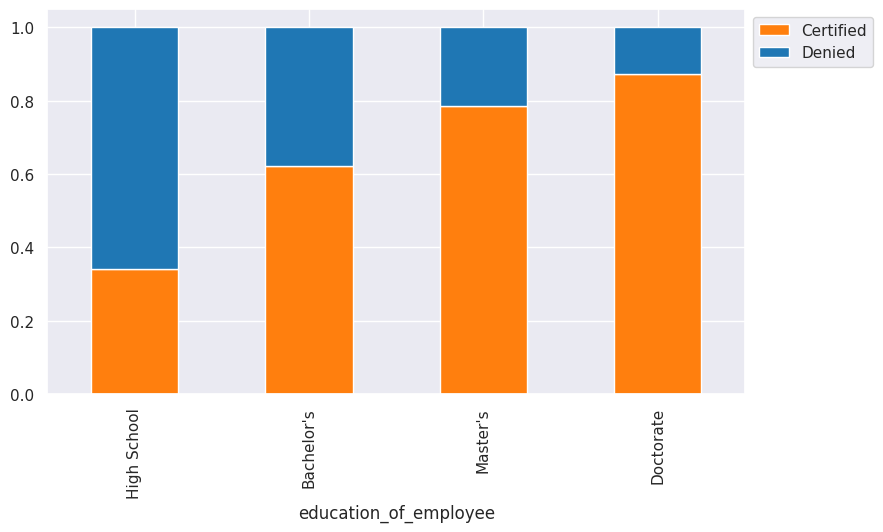

In [ ]:
stacked_barplot(df, 'education_of_employee', 'case_status')

- Education seems to be strongly correlated with visa case status.
- Employees with High School educations make up about 13% of all applications and have the highest denial rates at 66%.
- Employees with Doctorate degrees have the lowest denial rates at 13%.
- The data shows that as the level of education increases for an employee, the more likely they are to be approved for a visa.

**`has_job_experience vs case_status`**
- **Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Does work experience influence visa status?**

case_status         Certified  Denied  Total  Percentage
has_job_experience                                      
N                        5994    4684  10678      41.907
Y                       11024    3778  14802      58.093


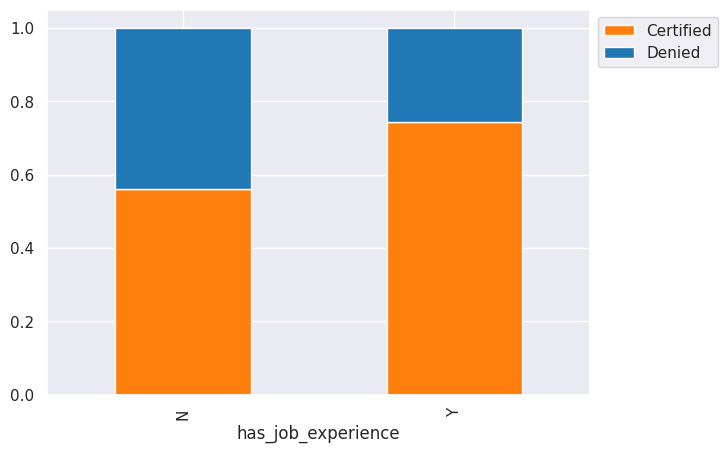

In [ ]:
stacked_barplot(df, 'has_job_experience', 'case_status')

- Employees with work experience have lower denial rates than employees with no work experience.

**`requires_job_training vs case_status`**

case_status            Certified  Denied  Total  Percentage
requires_job_training                                      
N                          15012    7513  22525      88.403
Y                           2006     949   2955      11.597


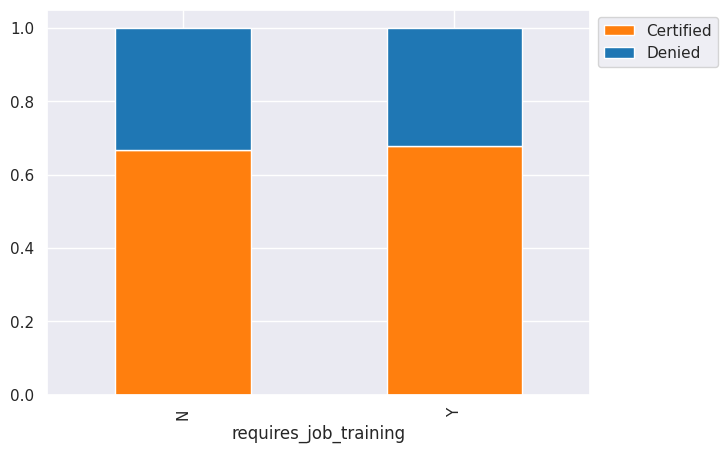

In [ ]:
stacked_barplot(df, 'requires_job_training', 'case_status')

- No correlation is noted between the requirement of job training and visa status.

**Exploring the relationship between `has_job_experience, requires_job_training, and case_status`.**

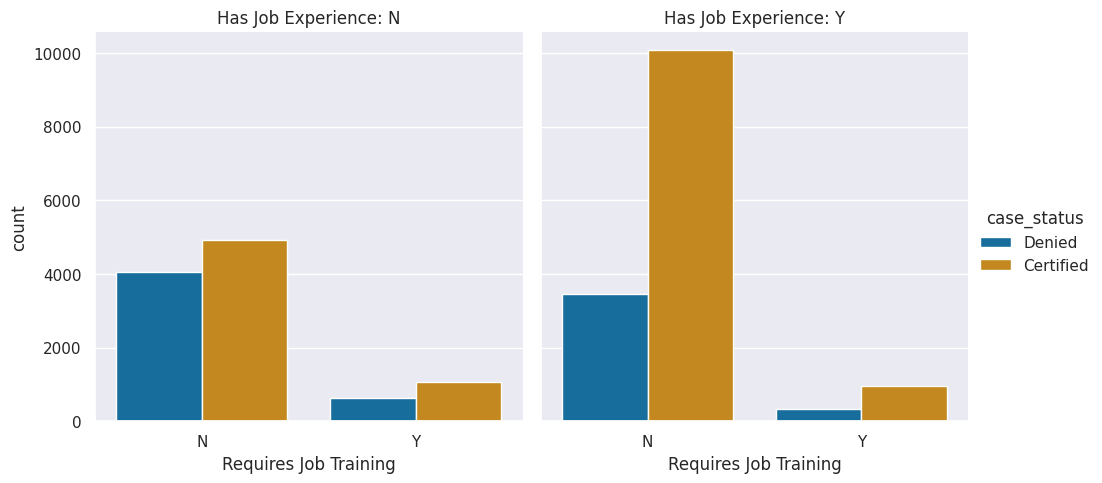

In [ ]:
#Generate barplots
g = sns.catplot(data=df, x='requires_job_training', hue='case_status', col='has_job_experience', kind='count', palette='colorblind')
#Set x label
g.set_axis_labels('Requires Job Training')
#Change column titles
g.set_titles('Has Job Experience: {col_name}');

In [ ]:
df.groupby(['has_job_experience', 'requires_job_training'])['case_status'].value_counts(normalize=True)

has_job_experience  requires_job_training  case_status
N                   N                      Certified     0.549
                                           Denied        0.451
                    Y                      Certified     0.628
                                           Denied        0.372
Y                   N                      Certified     0.745
                                           Denied        0.255
                    Y                      Certified     0.746
                                           Denied        0.254
Name: proportion, dtype: float64

- Regardless of whether the position requires job training, having work experience seems to boost the likelihood of getting approved for a visa.

**`region_of_employment vs case_status`**

case_status           Certified  Denied  Total  Percentage
region_of_employment                                      
Island                      226     149    375       1.472
Midwest                    3253    1054   4307      16.903
Northeast                  4526    2669   7195      28.238
South                      4913    2104   7017      27.539
West                       4100    2486   6586      25.848


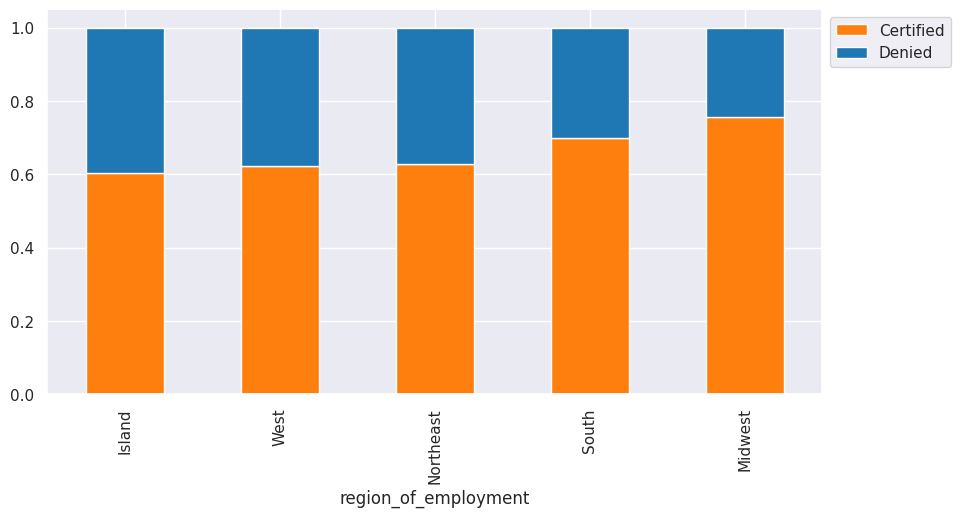

In [ ]:
stacked_barplot(df, 'region_of_employment', 'case_status')

- Workers whose intended region of employment is in the Midwest have the lowest denial rates.

**`unit_of_wage vs case_status`**
- **In the United States, employees are paid at different intervals. Which pay unit is most likely to be certified for a visa?**

case_status   Certified  Denied  Total  Percentage
unit_of_wage                                      
Hour                747    1410   2157       8.465
Month                55      34     89       0.349
Week                169     103    272       1.068
Year              16047    6915  22962      90.118


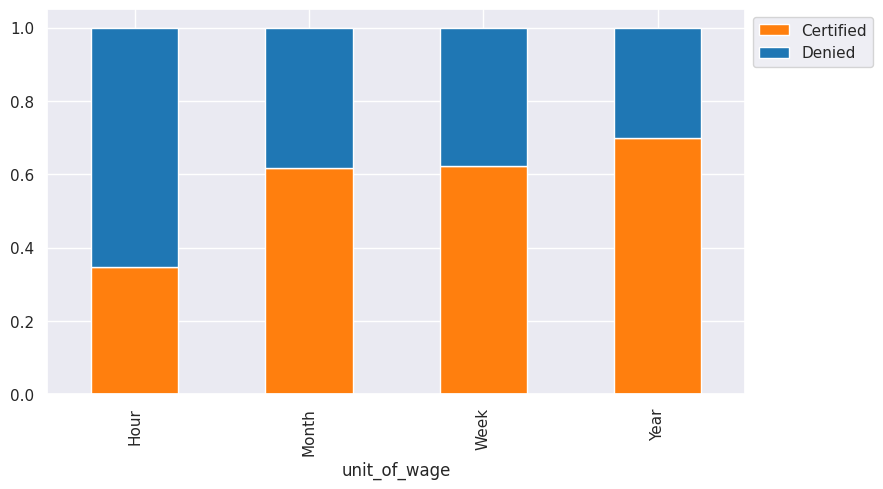

In [ ]:
stacked_barplot(df, 'unit_of_wage', 'case_status')

- Applicants with a yearly unit of wage are more likely to be approved for a visa.
- Applicants with an hourly unit of wage are more likely to get denied.

**`full_time_position vs case_status`**

case_status         Certified  Denied  Total  Percentage
full_time_position                                      
N                        1855     852   2707      10.624
Y                       15163    7610  22773      89.376


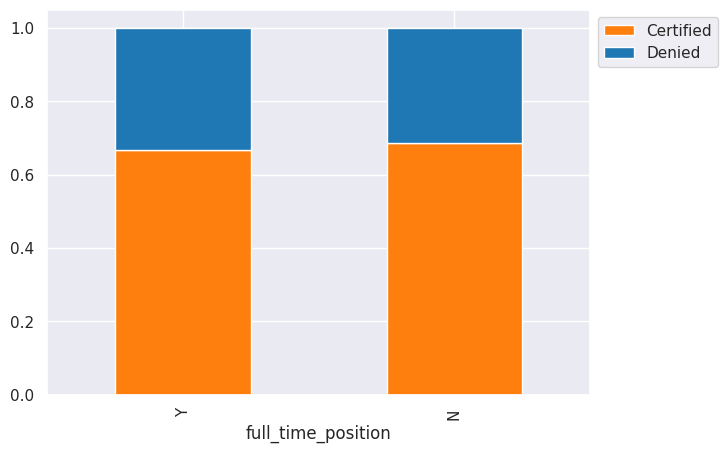

In [ ]:
stacked_barplot(df, 'full_time_position', 'case_status')

- No notable patterns exist between full time position status and case status.

## **Data Preprocessing**

- Missing value treatment (if needed)
- Feature engineering
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

####**Missing values**

In [ ]:
#Missing values
df.isnull().sum()

,0
case_id,0
continent,0
education_of_employee,0
has_job_experience,0
requires_job_training,0
no_of_employees,0
yr_of_estab,0
region_of_employment,0
prevailing_wage,0
unit_of_wage,0


- No missing values are present in the data.

####**Drop the following features:**
  - ` case_id` since this information adds no value to the analysis
  - `prevailing_wages` due to inaccuracies in the data

In [ ]:
df.drop(['case_id', 'prevailing_wage'], axis=1, inplace=True)

###**Feature Engineering**

- A column `company_age` will be created by subtracting `yr_of_estab` from 2016, since that is the year the data was collected.
- The feature `yr_of_estab` will then be dropped, since it is categorical by nature.

In [ ]:
#Create company_age feature
df['company_age'] = 2016 - df['yr_of_estab']

#Drop yr_of_estab
df.drop(['yr_of_estab'], axis=1, inplace=True)

- **`company_age` before outlier treatment**

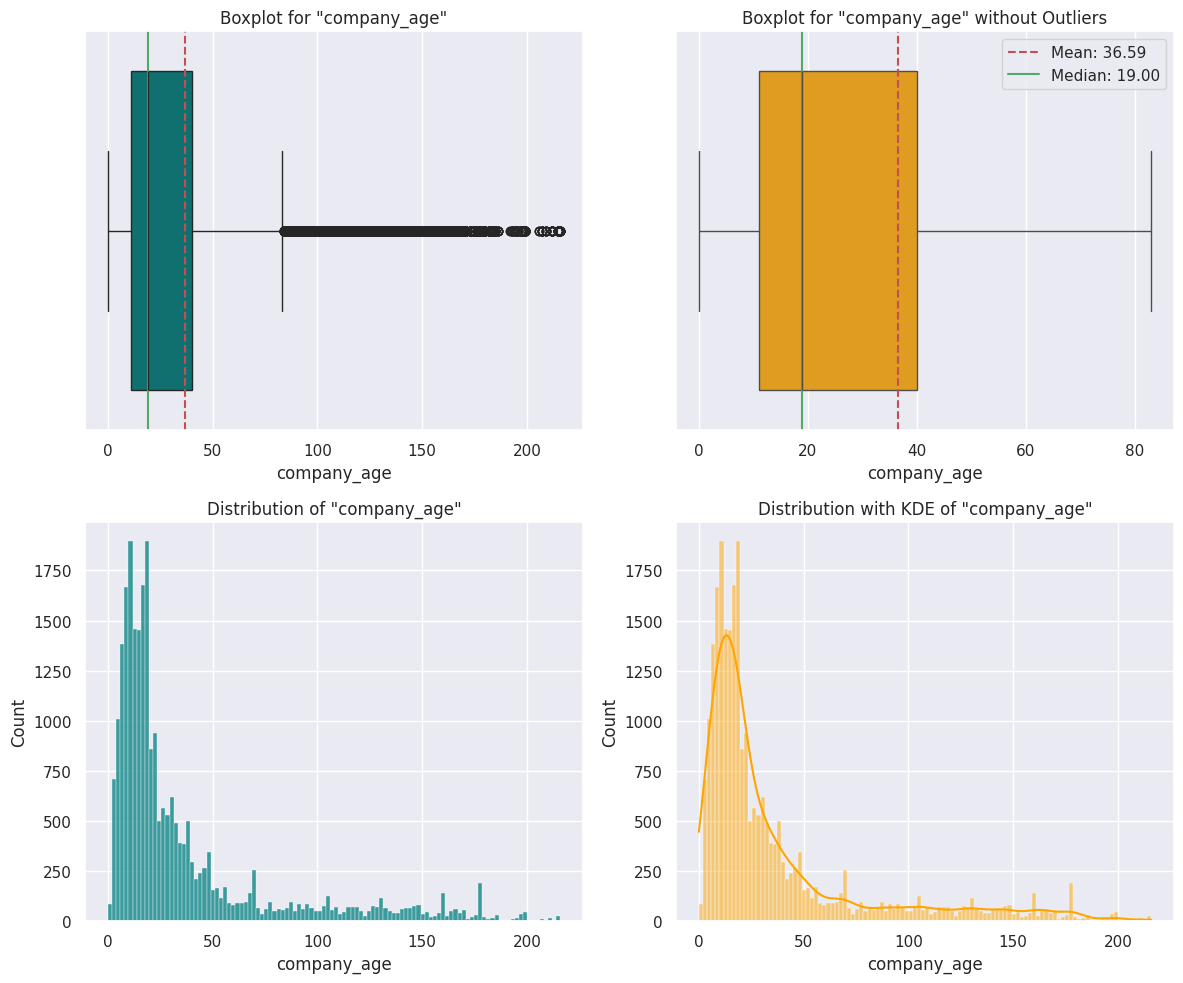

In [ ]:
boxplots_hist_1var(df, 'company_age')

- 75% of the companies requesting foreign workers have been in business for 40 years or less.

###**Outlier/Extreme Value Treatment**



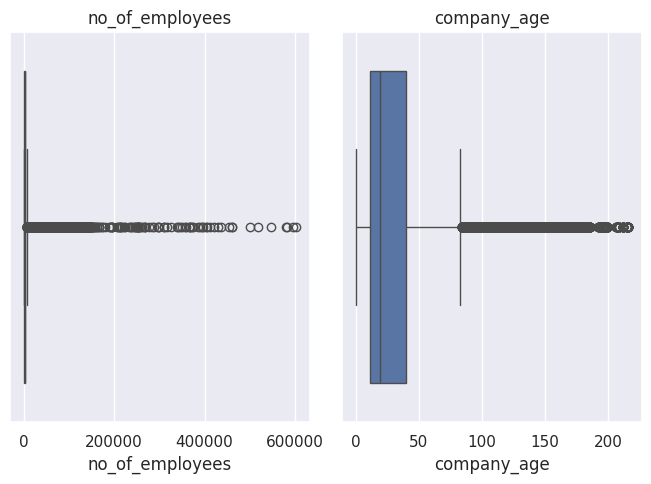

In [ ]:
#Display outliers
num_col = df.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(10,5))

for i, col in enumerate(num_col):
  plt.subplot (1,3, i+1)
  sns.boxplot(data=df, x=col)
  plt.title(col)
  plt.tight_layout()

- There are many outliers in `no_of_employees` and `company_age` column.
- Let us observe the percentage of outliers for each feature and also review their respective minimum and maximum values.

In [ ]:
#Use calculate the upper and lower whisker values for each numeric column
Q1 = df[num_col].quantile(0.25)
Q3 = df[num_col].quantile(0.75)

IQR = Q3 - Q1

lower_whisker = Q1 - 1.5*IQR
upper_whisker = Q3 + 1.5*IQR

#Percentage of outliers in each column
print('Percentage of Outliers per Column:')
print(((df[num_col] < lower_whisker) | (df[num_col] > upper_whisker)).sum() / df.shape[0] *100)

Percentage of Outliers per Column:
no_of_employees    6.107
company_age       12.794
dtype: float64


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_employees,25480.000,5667.043,22877.929,-26.000,1022.000,2109.000,3504.000,602069.000
company_age,25480.000,36.590,42.367,0.000,11.000,19.000,40.000,216.000


- Negative values in the `no_of_employees` column are implausible. The upper and lower whisker values will be calculated to ensure that negative values are treated.
- We will use 1.5 as a factor to calculate the upper and lower whiskers for each numerical column as follows:
  - Upper whisker = Q3 + 1.5*IQR
  - Lower whisker = Q1 - 1.5*IQR

In [ ]:
#Upper and lower whisker values for each column
for col in num_col:
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)

  IQR = Q3 - Q1

  upper_whisk = Q3 +1.5 * IQR
  lower_whisk = Q1 - 1.5 *IQR

  print(f'Upper whisker value for {col} is {upper_whisk}')
  print(f'Lower whisker value for {col} is {lower_whisk}')
  print('-' *50)

Upper whisker value for no_of_employees is 7227.0
Lower whisker value for no_of_employees is -2701.0
--------------------------------------------------
Upper whisker value for company_age is 83.5
Lower whisker value for company_age is -32.5
--------------------------------------------------


- **Bounds for `no_of_employees:`**
  - The lower whisker for `no_of_employees` will not catch negative values close to 0. We will have to use a manual input of 0 when clipping the lower bounds of `no_of_employees`.
  - It is also observed that the the upper whisker value for `no_of_employees` is 7,227 while the maximum value is 602,069. In an effort to preserve these observations as outliers while limiting the extremity of their values, we will consider capping this column at 10,000.
  - For number of employees, we will calculate the percentage of entries that fall beyond the bounds mentioned above (0 - 10,000).
- **Bounds for `company_age`**:
  - It is noted that the the lower whisker value for `company_age` is -32.5, but no negative entries in this column are present. Therefore, a manual input of 0 for the lower bound will suffice.
  - The upper whisker value for this feature is 83.5, in comparison the maximum value of 216. Similar to `no_of_employees`, we will consider capping this column at 100 in an effort to preserve outlier entries while limiting the magnitude of their values.
  - We will calculate the percentage of observations that have a company age greater than 100.

In [ ]:
#Percentage of entries with no_of_employees <= 0
emp_lt_0 = df[df['no_of_employees'] <= 0]
print('Percentage of entries with no_of_employees <= 0:')
perc_lt_0 = emp_lt_0.shape[0] / df.shape[0]*100
print(f'{perc_lt_0:.3f} %')

#Calculate percentage of employees > 10,000
emp_gt_10k = df[df['no_of_employees'] >= 10000]
print('Percentage of entries with no_of_employees > 10000:')
perc_gt_10k = emp_gt_10k.shape[0] / df.shape[0]*100
print(f'{perc_gt_10k:.3f} %')

Percentage of entries with no_of_employees <= 0:
0.130 %
Percentage of entries with no_of_employees > 10000:
5.636 %


In [ ]:
#Percentage of company_age >= 100
age_over_100 = df[df['company_age'] >= 100]

print('Percentage of entries with company age >= 100:')
perc2 = age_over_100.shape[0] / df.shape[0]*100
print(f'{perc2:.3f} %')

Percentage of entries with company age >= 100:
10.608 %


- The percentage of observations that will be treated using the proposed bounds is very close to the percentage of all outliers.
- Thus, the treatment of outliers and extreme values will be as follows:
  - Outlier/Extreme Value Treatment for `no_of_employees`:
    - We will treat this feature so that the observations range from 0 - 10,000.
  - Outlier/Extreme Value Treatment for `company_age`:
    - We will treat this feature so that its values range from 0 - 100 years.
- As noted previously, all outliers except the negative entries in `no_of_employees` appeared to be true values. Therefore, we want to preserve these observations as outliers, while limiting the extremity of their values.

####**Treat outliers/extreme values for `no_of_employees`**

In [ ]:
df['no_of_employees'] = np.clip(df['no_of_employees'], 0, 10000)

####**Treat outliers/extreme values for `company_age`**

In [ ]:
df['company_age'] = np.clip(df['company_age'], 0, 100)

In [ ]:
#check updated min and max for df
df.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_employees,25480.000,2657.806,2339.504,0.000,1022.000,2109.000,3504.000,10000.000
company_age,25480.000,31.967,29.983,0.000,11.000,19.000,40.000,100.000


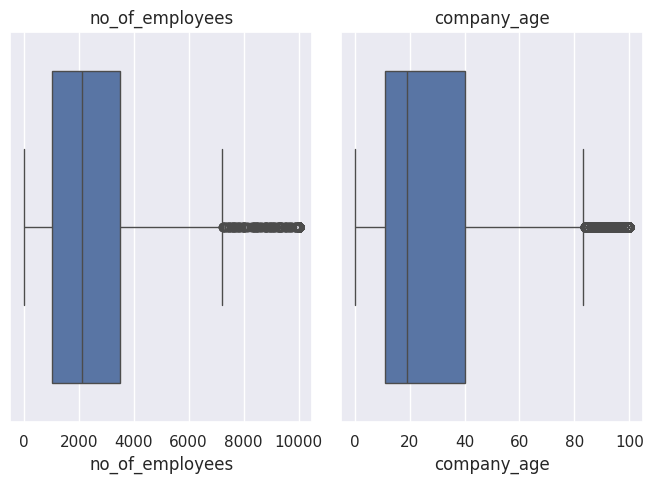

In [ ]:
#Display outliers
num_col = df.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(10,5))

for i, col in enumerate(num_col):
  plt.subplot (1,3, i+1)
  sns.boxplot(data=df, x=col)
  plt.title(col)
  plt.tight_layout()

- The quantities of extreme values have been successfully restricted.

## **EDA**

- The features that have been manipulated will be reviewed once more.

###**`company_age`**

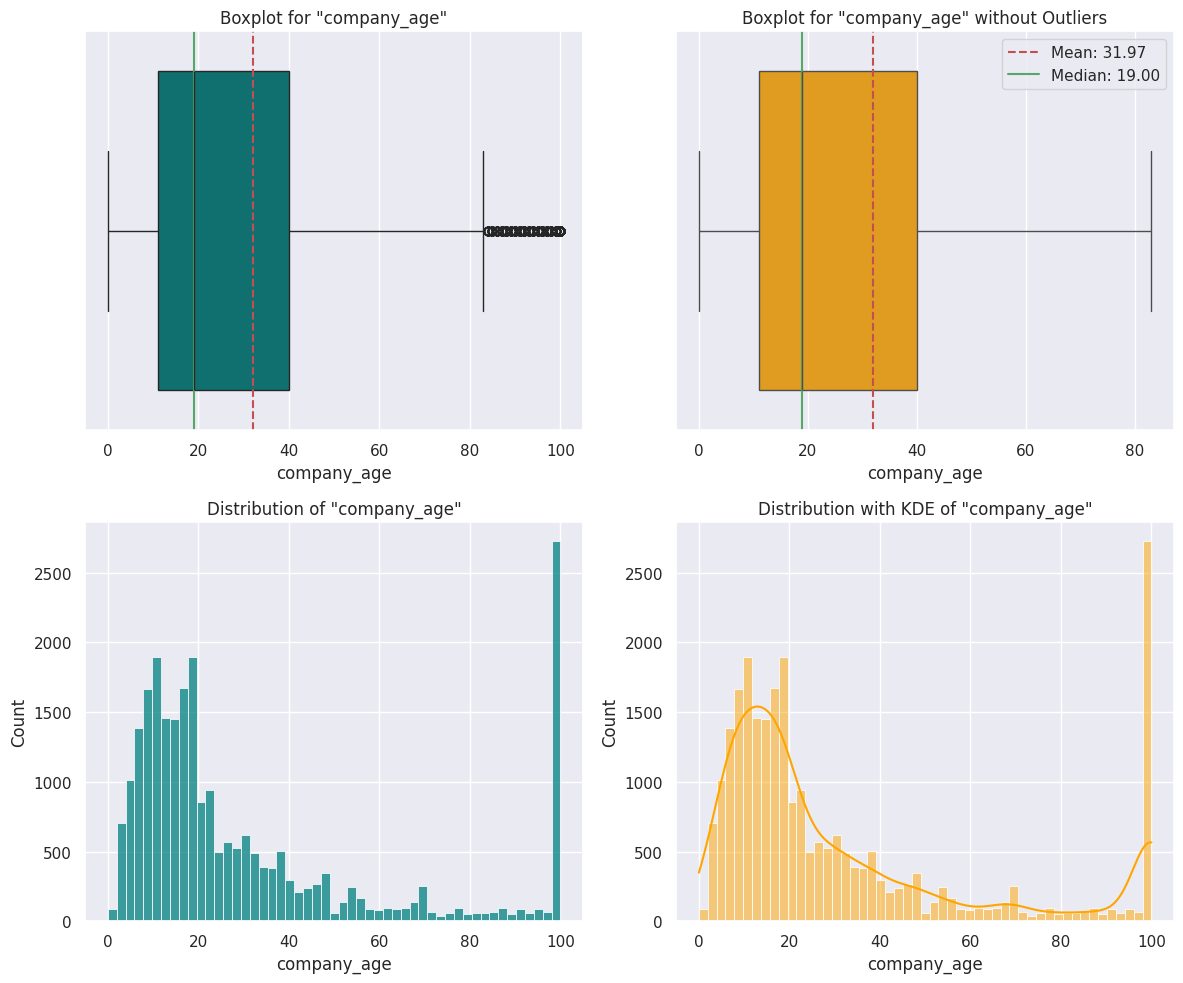

In [ ]:
boxplots_hist_1var(df, 'company_age')

- The mean `company_age` went from 37 to 32 after restricting the bounds.

###**`company_age vs case_status`**

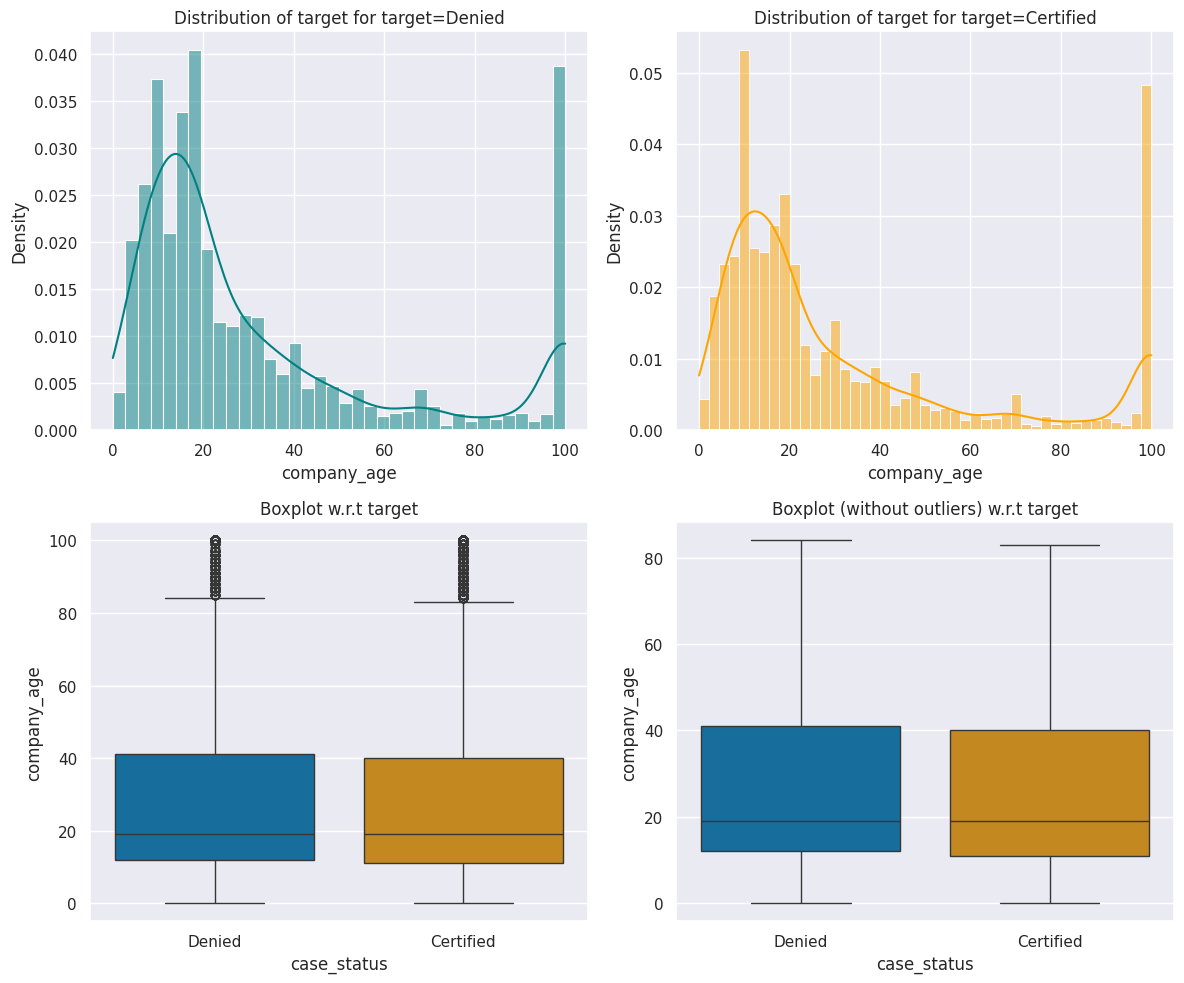

In [ ]:
distribution_plot_wrt_target(df, 'company_age', 'case_status')

- The distribution of company age for denied cases is very similar to that of certified cases.
- It is noted however, that denied cases have the highest distribution for companies that are close to 20 years old.
- Certified cases have the highest distribution for companies that are around 10 years old.

###**`no_of_employees`**

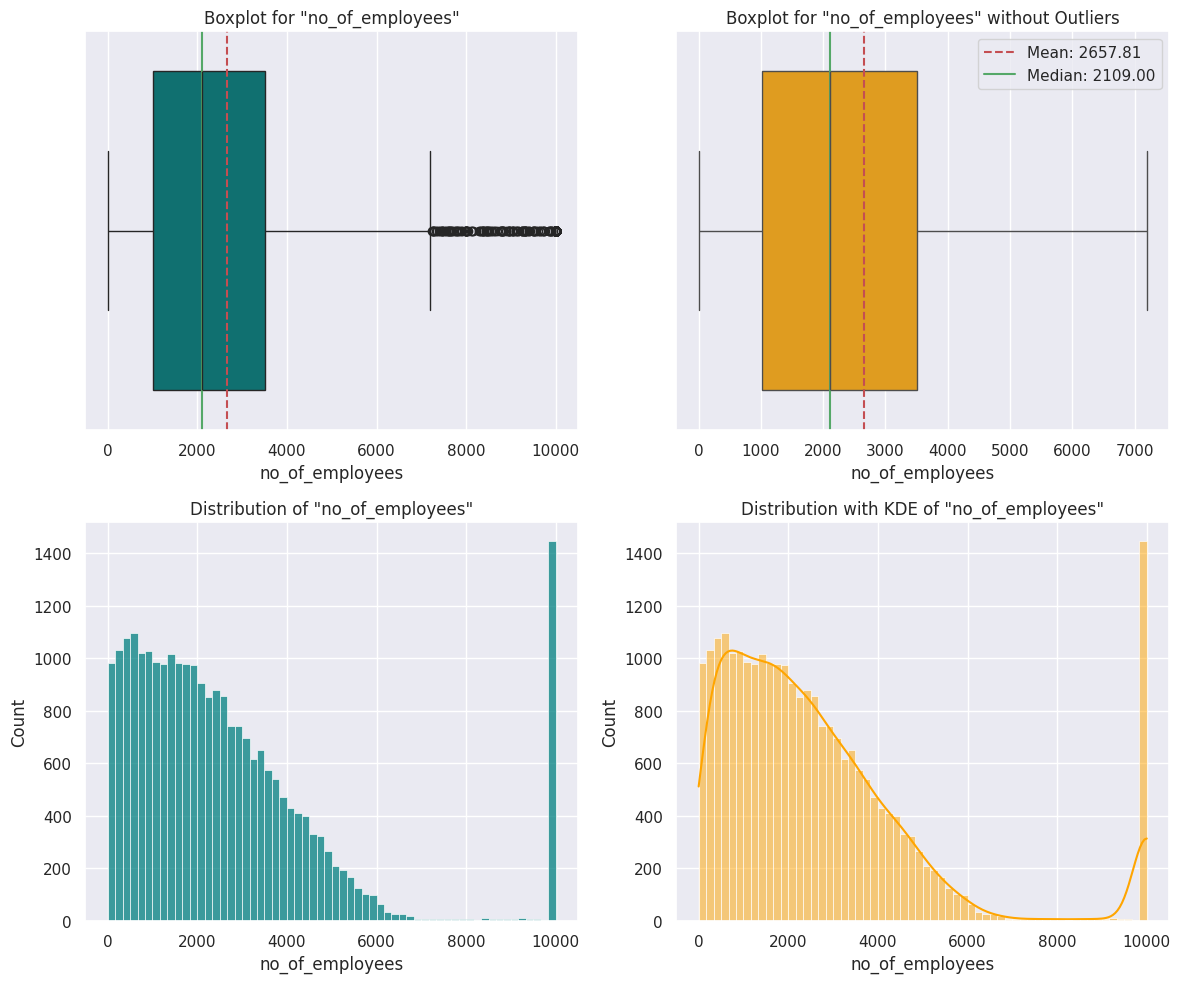

In [ ]:
boxplots_hist_1var(df, 'no_of_employees')

- The average `no_of_employees` went from 5667 to 2658.

###**`no_of_employees vs case_status`**

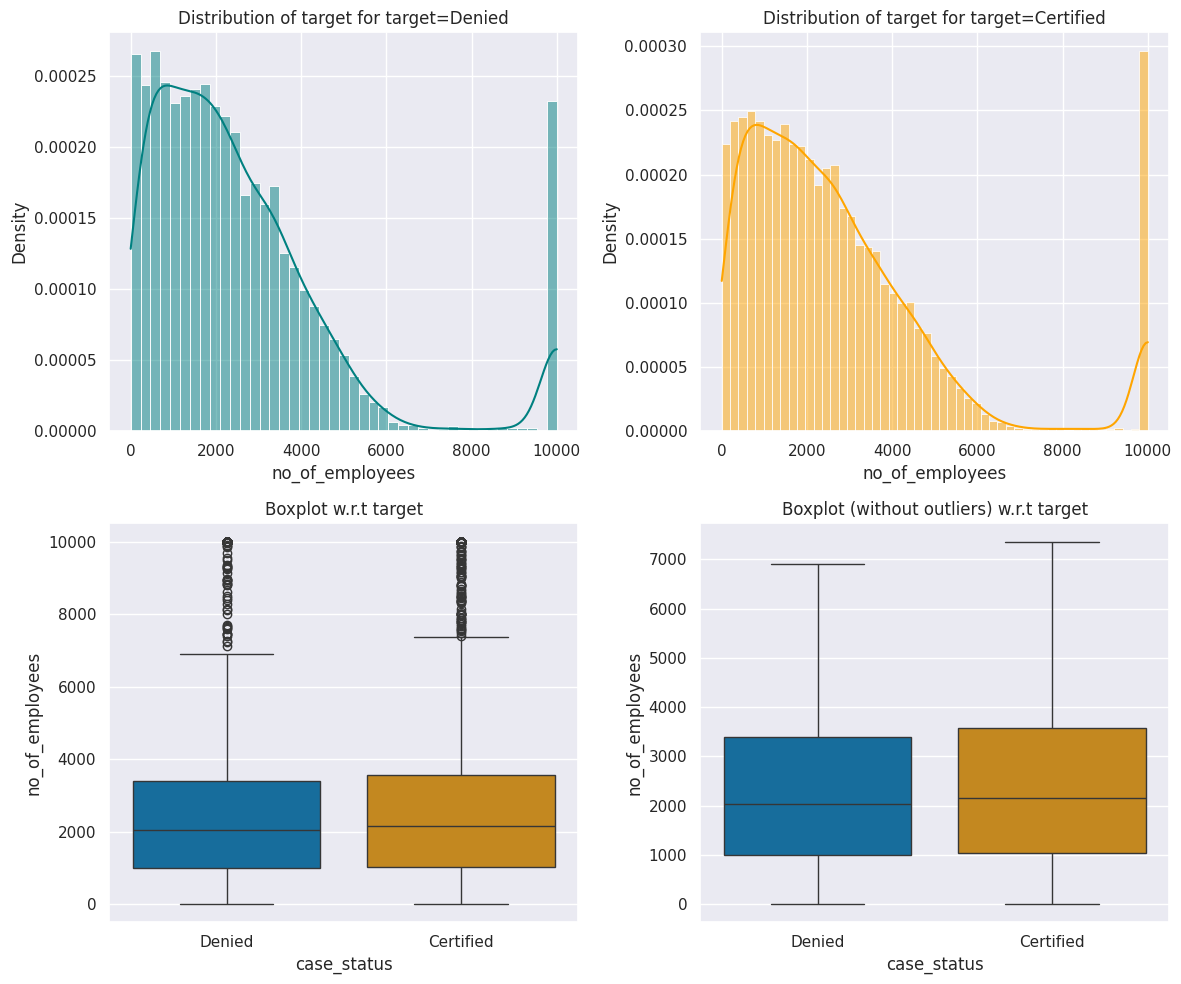

In [ ]:
distribution_plot_wrt_target(df, 'no_of_employees', 'case_status')

- No major patterns are detected among `no_of_employees` and `case status`.

###**Data Preparation for Modeling**

- Since `education_of_employee` is ordinal by nature, we will label encode them as follows:
  - High School = 1
  - Bachelor's = 2
  - Master's = 3
  - Doctorate = 4

In [ ]:
df['education_of_employee'] = df['education_of_employee'].replace({
    'High School': 1,
    "Bachelor's": 2,
    "Master's": 3,
    'Doctorate': 4
})


- We will label encode the target variable `case_status` so that 0 = denied and 1 = certified.

In [ ]:
df['case_status'] = df['case_status'].apply(lambda x: 1 if x == "Certified" else 0)
df.head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,region_of_employment,unit_of_wage,full_time_position,case_status,company_age
0,Asia,1,N,N,10000,West,Hour,Y,0,9
1,Asia,3,Y,N,2412,Northeast,Year,Y,1,14
2,Asia,2,N,Y,10000,West,Year,Y,0,8
3,Asia,2,N,N,98,West,Year,Y,0,100
4,Africa,3,Y,N,1082,South,Year,Y,1,11


In [ ]:
#Review data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   continent              25480 non-null  object
 1   education_of_employee  25480 non-null  int64 
 2   has_job_experience     25480 non-null  object
 3   requires_job_training  25480 non-null  object
 4   no_of_employees        25480 non-null  int64 
 5   region_of_employment   25480 non-null  object
 6   unit_of_wage           25480 non-null  object
 7   full_time_position     25480 non-null  object
 8   case_status            25480 non-null  int64 
 9   company_age            25480 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 1.9+ MB


- The following features will be one-hot encoded since they are of the data type 'object':
  - `continent, has_job_experience, requires_job_training, region_of_employment, unit_of_wage and full_time_position`

In [ ]:
#Generate list of object type features
one_hot_cols = df.select_dtypes(include=['object']).columns.tolist()

In [ ]:
#Generate dummy variables for mentioned features
df = pd.get_dummies(df, columns = one_hot_cols, dtype='float')

In [ ]:
df.head()

,education_of_employee,no_of_employees,case_status,company_age,continent_Africa,continent_Asia,continent_Europe,continent_North America,continent_Oceania,continent_South America,has_job_experience_N,has_job_experience_Y,requires_job_training_N,requires_job_training_Y,region_of_employment_Island,region_of_employment_Midwest,region_of_employment_Northeast,region_of_employment_South,region_of_employment_West,unit_of_wage_Hour,unit_of_wage_Month,unit_of_wage_Week,unit_of_wage_Year,full_time_position_N,full_time_position_Y
0,1,10000,0,9,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,0.000,0.000,1.000
1,3,2412,1,14,0.000,1.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000
2,2,10000,0,8,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,1.000
3,2,98,0,100,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,1.000
4,3,1082,1,11,1.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000


####**Organize train and test sets**

In [ ]:
#Separate independent and target features
X = df.drop('case_status', axis=1)
y = df['case_status']

In [ ]:
#Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=1)

In [ ]:
#Check shape of X_train and X_test
print(f'X_train shape: {X_train.shape} \nX_test.shape:{X_test.shape}')

X_train shape: (17836, 24) 
X_test.shape:(7644, 24)


In [ ]:
#Check distribution of classes in target variable
print(f'Target distribution for y: {y.value_counts(1)}')
print('-'*40)
print(f'Target distribution for y test: {y_test.value_counts(1)}')
print('-'*40)
print(f'Target distribution for y_train: {y_train.value_counts(1)}')

Target distribution for y: case_status
1   0.668
0   0.332
Name: proportion, dtype: float64
----------------------------------------
Target distribution for y test: case_status
1   0.668
0   0.332
Name: proportion, dtype: float64
----------------------------------------
Target distribution for y_train: case_status
1   0.668
0   0.332
Name: proportion, dtype: float64


- Train and test sets are successfully created.

####**The following functions will be used to evaluate the models**

In [ ]:
#Function to plot confusion matrix
def confusion_matrix_sklearn(model, predictors, target, ax=None):
    """
    To plot the confusion_matrix with row-wise percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    ax: the axis to plot on (for subplots)
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    cm_perc = [[x/sum(row) for x in row] for row in cm]
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / row.sum())]
            for row in cm for item in row
        ]
    ).reshape(2, 2)

    sns.heatmap(cm_perc, annot=labels, fmt="", ax=ax)
    ax.set_ylabel('True Label')
    ax.set_xlabel('Predicted Label')

In [ ]:
#Function to calculate and print evaluation metrics
def model_perf_clf_sklearn(model):
    """
    Function to compute different metrics to check classification model performance

    model: classifier

    """

    #Predicting using the independent variables
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)

    #Calculate accuracy for train and test sets
    train_acc = accuracy_score(y_train, pred_train)
    test_acc = accuracy_score(y_test, pred_test)

    #Calculate recall for train and test sets
    train_recall = metrics.recall_score(y_train, pred_train)
    test_recall = metrics.recall_score(y_test, pred_test)

    #Calculate precision score for train and test sets
    train_precision = metrics.precision_score(y_train, pred_train)
    test_precision = metrics.precision_score(y_test, pred_test)

    #Calculate F1 score
    train_f1 = f1_score(y_train, pred_train)
    test_f1 = f1_score(y_test, pred_test)

    #Create a data frame with evaluation metrics
    df_perf = pd.DataFrame(
        {
            'Train Accuracy': train_acc,
            'Test Accuracy': test_acc,
            'Train Recall': train_recall,
            'Test Recall': test_recall,
            'Train Precision': train_precision,
            'Test Precision': test_precision,
            'Train F1': train_f1,
            'Test F1': test_f1,
        },
        index=[0],
    )

    return df_perf

####**Model performance metric selection**

- The Office of Foreign Labor Certification (OFLC) aims to shortlist applicants that are likely to have their visa approved.
- There are two possible errors that can occur, as follows:
  - False Positive: An application for a visa is predicted to be approved, when it will actually be denied.
    - Example: Predicted case_status = 1, while actual case_status = 0
    - In action, an application may get shortlisted, and still be denied.
  - False Negative: An application is predicted to get denied, when it will actually be approved.
    - Example: Predicted case_status = 0, while actual case_status = 1
    - In action, an application may go through a lengthy review process, even though it will be approved.
- Both errors are undesirable but false negatives are more detrimental to the company's effort of shortlisting applications with high chances of approval. Therefore, we will focus on maximizing recall score, while ensuring accuracy, F1 and precision scores are within reason.

## **Building bagging and boosting models**

###**Bagging Models**

####**Bagging Classifier with Default Parameters**

In [ ]:
bagging_estimator = BaggingClassifier(random_state=1)
bagging_estimator.fit(X_train, y_train)

BaggingClassifier(random_state=1)

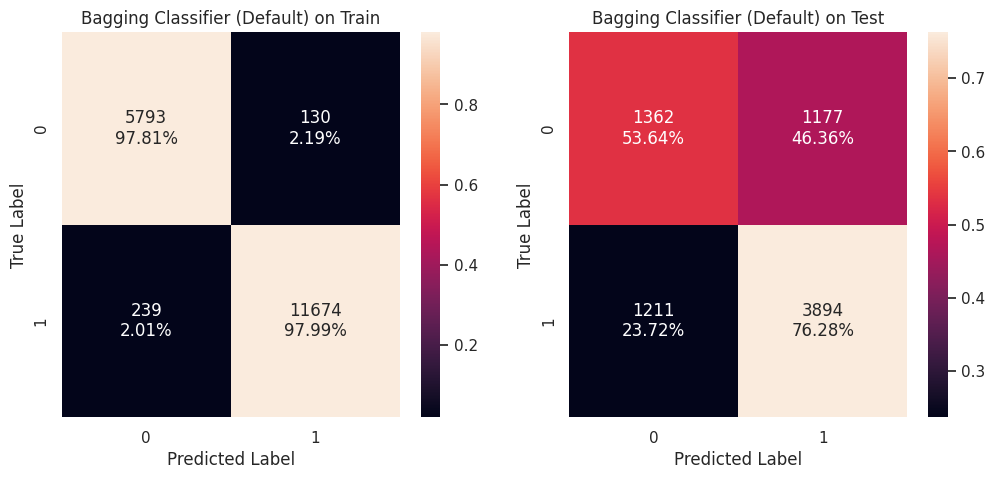

In [ ]:
#Create subplot layot for 2 confusion matrices side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

#Call confusion matrix on train set (left plot)
confusion_matrix_sklearn(bagging_estimator, X_train, y_train, ax=axes[0])
axes[0].set_title('Bagging Classifier (Default) on Train');

#Call confusion matrix function on test set (right plot)
confusion_matrix_sklearn(bagging_estimator, X_test, y_test, ax=axes[1])
axes[1].set_title('Bagging Classifier (Default) on Test');

In [ ]:
bagging_estimator_perf = model_perf_clf_sklearn(bagging_estimator)
print('Bagging Classifier (Default) Performance:')
bagging_estimator_perf

Bagging Classifier (Default) Performance:


,Train Accuracy,Test Accuracy,Train Recall,Test Recall,Train Precision,Test Precision,Train F1,Test F1
0,0.979,0.688,0.980,0.763,0.989,0.768,0.984,0.765


- The Bagging Classifier with default parameters is not generalizing well. It performs well on the training set but very poorly on the test set, which is indicative of an overfitting model.
- On the test set, this model accurately predicts 76% of certified cases and predicts ~54% of denied cases.

####**Bagging Classifier - Hypertuned**

In [ ]:
bagging_estimator_tuned = BaggingClassifier(random_state=1)

parameters = {'max_samples': [0.8,0.9,1],
              'max_features': [0.7,0.8,0.9],
              'n_estimators': [30,50,70],
             }

#Set scoring type = recall
acc_scorer = metrics.make_scorer(metrics.recall_score)

#Run grid search
grid_obj = GridSearchCV(bagging_estimator_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

#Set the classifier to the best combination of parameters
bagging_estimator_tuned = grid_obj.best_estimator_

#Fit the best algorithm to the data
bagging_estimator_tuned.fit(X_train, y_train)

BaggingClassifier(max_features=0.7, max_samples=1, n_estimators=50,
                  random_state=1)

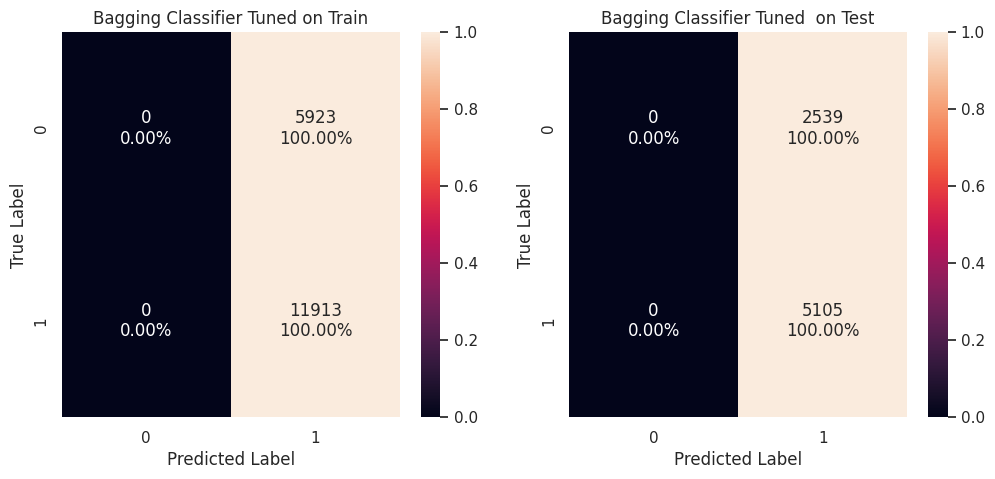

In [ ]:
#Generate and print confusion matrices for train and test sets
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

#Call confusion matrix on train set (left plot)
confusion_matrix_sklearn(bagging_estimator_tuned, X_train, y_train, ax=axes[0])
axes[0].set_title('Bagging Classifier Tuned on Train');

#Call confusion matrix function on test set (right plot)
confusion_matrix_sklearn(bagging_estimator_tuned, X_test, y_test, ax=axes[1])
axes[1].set_title('Bagging Classifier Tuned  on Test');

In [ ]:
bagging_estimator_tuned_perf = model_perf_clf_sklearn(bagging_estimator_tuned)
print('Bagging Classifier (Tuned) Performance:')
bagging_estimator_tuned_perf

Bagging Classifier (Tuned) Performance:


,Train Accuracy,Test Accuracy,Train Recall,Test Recall,Train Precision,Test Precision,Train F1,Test F1
0,0.668,0.668,1.000,1.000,0.668,0.668,0.801,0.801


- The hypertuned bagging classifier is predicting that all cases will be approved. This is not ideal for the business objective, despite having eliminated overfitting and obtaining a perfect recall score.

####**Random Forest Classifier with Default Parameters**

In [ ]:
#Train the random forest classifier
rf_estimator=RandomForestClassifier(random_state=1)
rf_estimator.fit(X_train,y_train)

RandomForestClassifier(random_state=1)

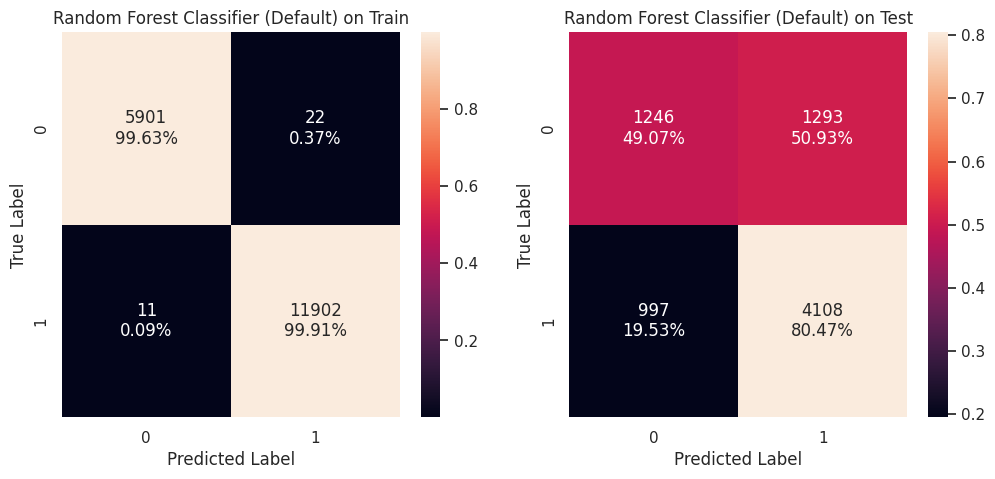

In [ ]:
#Generate and print confusion matrices for train and test sets
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

#Call confusion matrix on train set (left plot)
confusion_matrix_sklearn(rf_estimator, X_train, y_train, ax=axes[0])
axes[0].set_title('Random Forest Classifier (Default) on Train');

#Call confusion matrix function on test set (right plot)
confusion_matrix_sklearn(rf_estimator, X_test, y_test, ax=axes[1])
axes[1].set_title('Random Forest Classifier (Default) on Test');

In [ ]:
rf_estimator_perf = model_perf_clf_sklearn(rf_estimator)
print('Random Forest Classifier (Default) Performance:')
rf_estimator_perf

Random Forest Classifier (Default) Performance:


,Train Accuracy,Test Accuracy,Train Recall,Test Recall,Train Precision,Test Precision,Train F1,Test F1
0,0.998,0.700,0.999,0.805,0.998,0.761,0.999,0.782


- This model shows strong signs of overfitting due to the vast discrepancies between the test and train set performance metrics.
- This model can accurately predict 80% of the cases that will be approved and  49% of the cases that will be denied on the test set.

####**Random Forest Classifier- Tuned**

In [ ]:
rf_estimator_tuned = RandomForestClassifier(random_state=1)

parameters = {"n_estimators": [50,110,25],
              "min_samples_leaf": np.arange(1, 4),
              "max_features": [0.3, 0.4, 0.5, 'sqrt'],
              "max_samples": np.arange(0.4, 0.7, 0.1)
             }

#Set scoring type = recall
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

#Run grid search
grid_obj = GridSearchCV(rf_estimator_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

#Set the classifier to the best combination of parameters
rf_estimator_tuned = grid_obj.best_estimator_

#Fit the best algorithm to the data.
rf_estimator_tuned.fit(X_train, y_train)

RandomForestClassifier(max_samples=0.4, min_samples_leaf=3, n_estimators=110,
                       random_state=1)

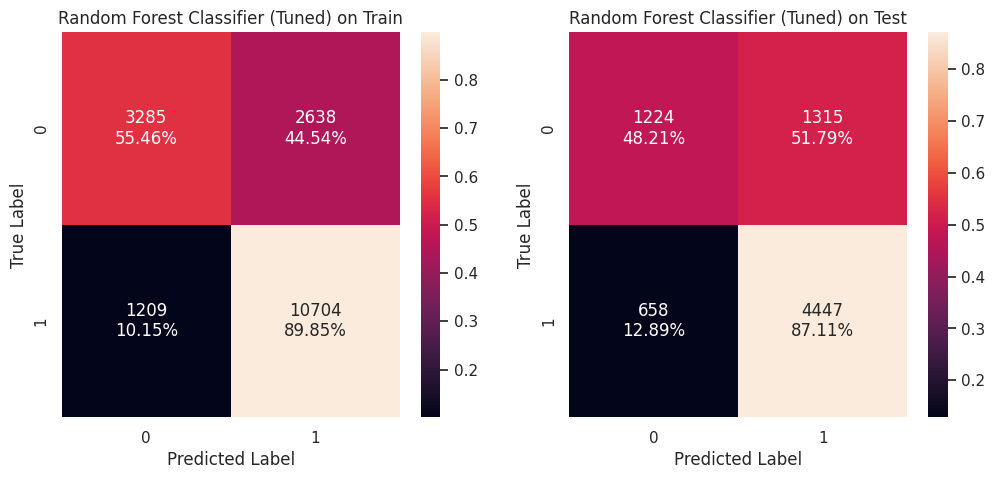

In [ ]:
#Generate and print confusion matrices for train and test sets
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

#Call confusion matrix on train set (left plot)
confusion_matrix_sklearn(rf_estimator_tuned, X_train, y_train, ax=axes[0])
axes[0].set_title('Random Forest Classifier (Tuned) on Train');

#Call confusion matrix function on test set (right plot)
confusion_matrix_sklearn(rf_estimator_tuned, X_test, y_test, ax=axes[1])
axes[1].set_title('Random Forest Classifier (Tuned) on Test');

In [ ]:
rf_estimator_tuned_perf = model_perf_clf_sklearn(rf_estimator_tuned)
print('Random Forest Classifier (Tuned) Performance:')
rf_estimator_tuned_perf

Random Forest Classifier (Tuned) Performance:


,Train Accuracy,Test Accuracy,Train Recall,Test Recall,Train Precision,Test Precision,Train F1,Test F1
0,0.784,0.742,0.899,0.871,0.802,0.772,0.848,0.818


- Hyperparameter tuning the random forest classifier has significantly reduced overfitting.
- The recall score on the test set is at its highest value, accurately predicting 87% of all certified cases on the test set. However, we are still only accurately predicting 48% of the cases that will be denied on the test set.

###**Boosting Models**

####**AdaBoost with Default Parameters**

In [ ]:
abc = AdaBoostClassifier(random_state=1)
abc.fit(X_train,y_train)

AdaBoostClassifier(random_state=1)

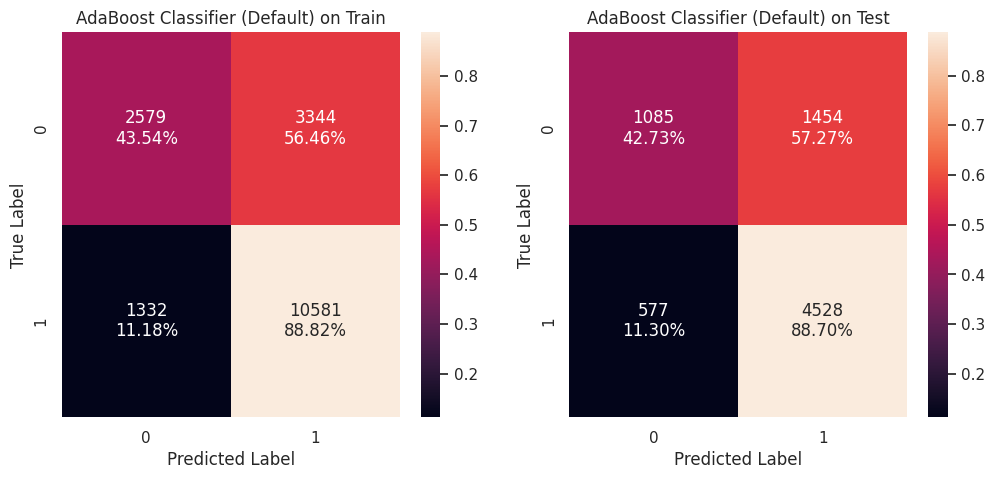

In [ ]:
#Generate and print confusion matrices for train and test sets
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

#Call confusion matrix on train set (left plot)
confusion_matrix_sklearn(abc, X_train, y_train, ax=axes[0])
axes[0].set_title('AdaBoost Classifier (Default) on Train');

#Call confusion matrix function on test set (right plot)
confusion_matrix_sklearn(abc, X_test, y_test, ax=axes[1])
axes[1].set_title('AdaBoost Classifier (Default) on Test');

In [ ]:
abc_perf = model_perf_clf_sklearn(abc)
print('AdaBoost Classifier (Default) Performance:')
abc_perf

AdaBoost Classifier (Default) Performance:


,Train Accuracy,Test Accuracy,Train Recall,Test Recall,Train Precision,Test Precision,Train F1,Test F1
0,0.738,0.734,0.888,0.887,0.760,0.757,0.819,0.817


- Recall score is slightly higher than the random forest model with tuned hyperparameters but is performing worse at accurately predicting denied cases on the test set.
- This model shows no signs of overfitting.

####**AdaBoost Tuned**

In [ ]:
abc_tuned = AdaBoostClassifier(random_state=1)

parameters = {
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "estimator": [
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}
#Set scoring type = recall
acc_scorer = metrics.make_scorer(metrics.recall_score)

#Run grid search
grid_obj = GridSearchCV(abc_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

#Set the classifier to the best combination of parameters
abc_tuned = grid_obj.best_estimator_

#Fit the best algorithm to the data
abc_tuned.fit(X_train, y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=2,
                                                    random_state=1),
                   learning_rate=0.01, random_state=1)

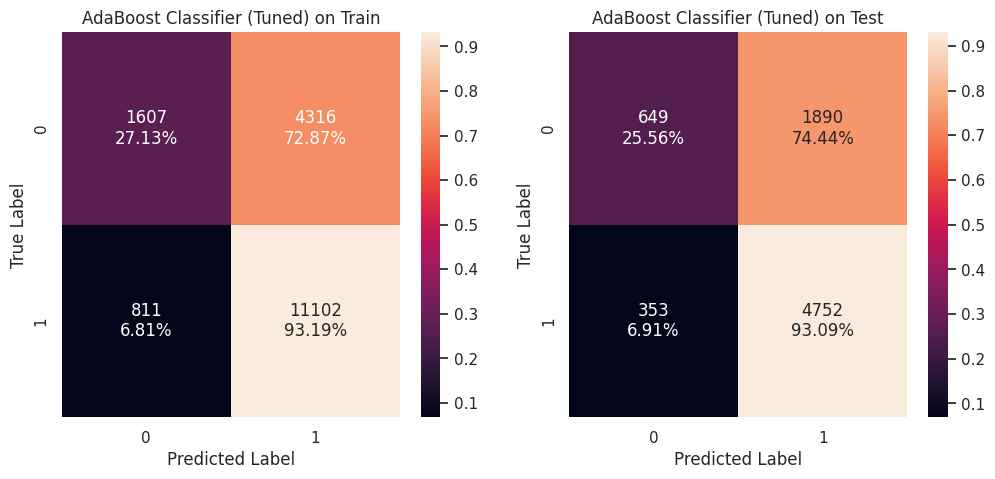

In [ ]:
#Generate and print confusion matrices for train and test sets
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

#Call confusion matrix on train set (left plot)
confusion_matrix_sklearn(abc_tuned, X_train, y_train, ax=axes[0])
axes[0].set_title('AdaBoost Classifier (Tuned) on Train');

#Call confusion matrix function on test set (right plot)
confusion_matrix_sklearn(abc_tuned, X_test, y_test, ax=axes[1])
axes[1].set_title('AdaBoost Classifier (Tuned) on Test');

In [ ]:
abc_tuned_perf = model_perf_clf_sklearn(abc_tuned)
print('AdaBoost Classifier (Tuned) Performance:')
abc_tuned_perf

AdaBoost Classifier (Tuned) Performance:


,Train Accuracy,Test Accuracy,Train Recall,Test Recall,Train Precision,Test Precision,Train F1,Test F1
0,0.713,0.707,0.932,0.931,0.720,0.715,0.812,0.809


- Hyperparameter tuning the AdaBoost classifier has resulted in a significant increase in the recall score for the test set.
- This is not particularly beneficial, given that in prioritizing recall, we are only accurately classifying 25% of truly denied cases.

####**Gradient Boosting Classifier with Default Parameters**

In [ ]:
gbc = GradientBoostingClassifier(random_state=1)
gbc.fit(X_train, y_train)

GradientBoostingClassifier(random_state=1)

####**Model Performance in Gradient Boosting Classifier**

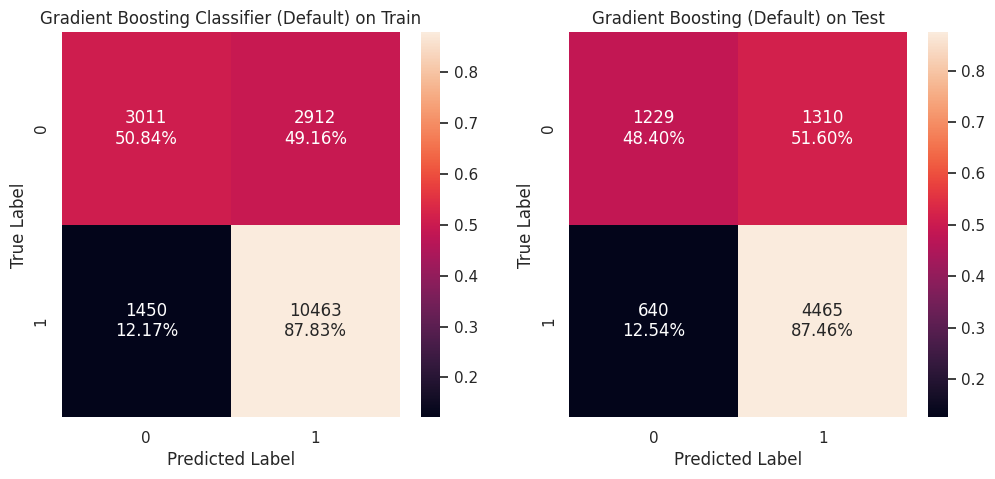

In [ ]:
#Generate and print confusion matrices for train and test sets
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

#Call confusion matrix on train set (left plot)
confusion_matrix_sklearn(gbc, X_train, y_train, ax=axes[0])
axes[0].set_title('Gradient Boosting Classifier (Default) on Train');

#Call confusion matrix function on test set (right plot)
confusion_matrix_sklearn(gbc, X_test, y_test, ax=axes[1])
axes[1].set_title('Gradient Boosting (Default) on Test');

In [ ]:
gbc_perf = model_perf_clf_sklearn(gbc)
print('GBC (Default) Performance:')
gbc_perf

GBC (Default) Performance:


,Train Accuracy,Test Accuracy,Train Recall,Test Recall,Train Precision,Test Precision,Train F1,Test F1
0,0.755,0.745,0.878,0.875,0.782,0.773,0.828,0.821


- The Gradient Boosting Classifier with default parameters has performance metrics very close to that of the random forest hypertuned model.
- Both models have a test recall score of ~87% and can accurately predict 48% of denied cases in the test set.

####**Gradient Boosting Tuned**

In [ ]:
# Choose the type of classifier.
gbc_tuned = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "subsample":[0.7,0.9],
    "max_features":[0.5,0.7,1],
}

#Set scoring type = recall
acc_scorer = metrics.make_scorer(metrics.recall_score)

#Run grid search
grid_obj = GridSearchCV(gbc_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

#Set the classifier to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

#Fit the best algorithm to the data
gbc_tuned.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           learning_rate=0.01, max_features=1, n_estimators=75,
                           random_state=1, subsample=0.9)

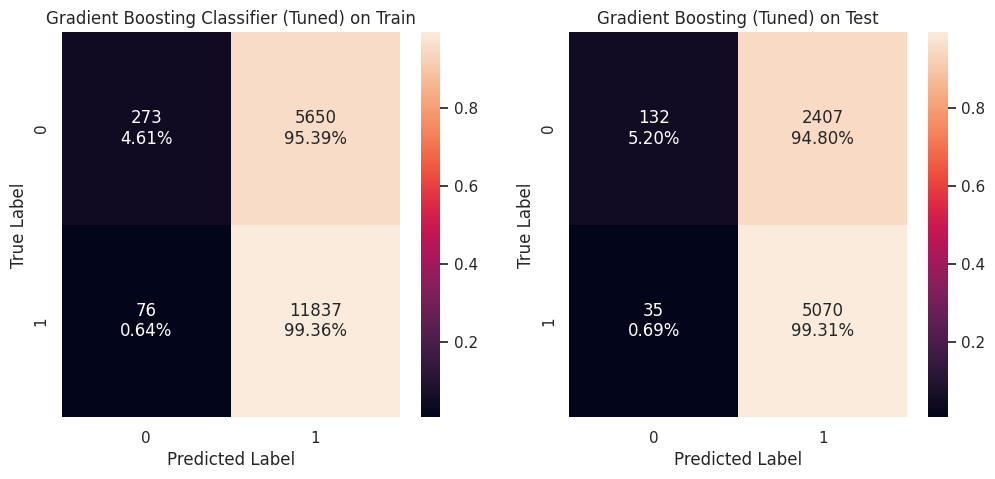

In [ ]:
#Generate and print confusion matrices for train and test sets
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

#Call confusion matrix on train set (left plot)
confusion_matrix_sklearn(gbc_tuned, X_train, y_train, ax=axes[0])
axes[0].set_title('Gradient Boosting Classifier (Tuned) on Train');

#Call confusion matrix function on test set (right plot)
confusion_matrix_sklearn(gbc_tuned, X_test, y_test, ax=axes[1])
axes[1].set_title('Gradient Boosting (Tuned) on Test');

In [ ]:
gbc_tuned_perf = model_perf_clf_sklearn(gbc_tuned)
print('GBC Tuned Performance:')
gbc_tuned_perf

GBC Tuned Performance:


,Train Accuracy,Test Accuracy,Train Recall,Test Recall,Train Precision,Test Precision,Train F1,Test F1
0,0.679,0.681,0.994,0.993,0.677,0.678,0.805,0.806


- By prioritizing recall, the model's ability to accurately predict denied cases has been compromised. This model too would be detrimental to the business objective.

####**XGBoost with Default Parameters**

In [ ]:
xgb = XGBClassifier(random_state=1,eval_metric='logloss')
xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=1, ...)

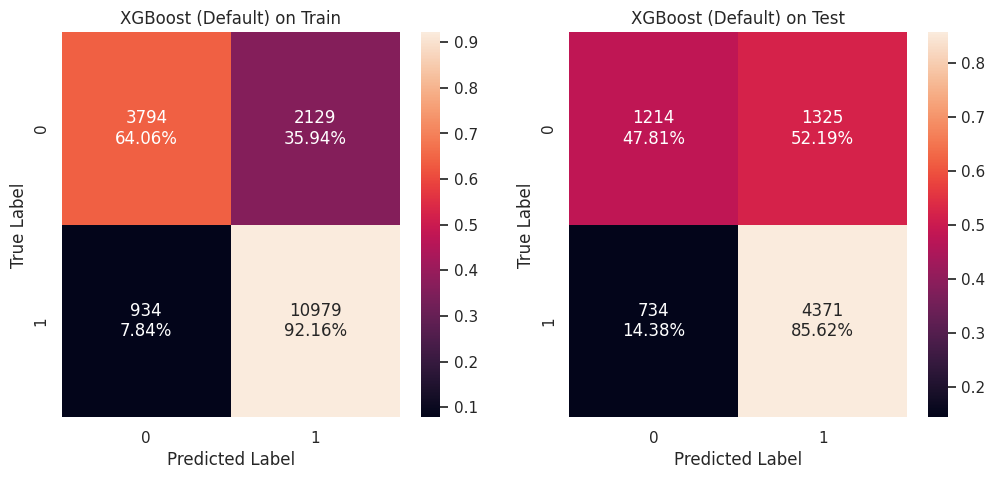

In [ ]:
#Generate and print confusion matrices for train and test sets
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

#Call confusion matrix on train set (left plot)
confusion_matrix_sklearn(xgb, X_train, y_train, ax=axes[0])
axes[0].set_title('XGBoost (Default) on Train');

#Call confusion matrix function on test set (right plot)
confusion_matrix_sklearn(xgb, X_test, y_test, ax=axes[1])
axes[1].set_title('XGBoost (Default) on Test');

In [ ]:
xgb_perf = model_perf_clf_sklearn(xgb)
print('XGBoost (Default) Performance:')
xgb_perf

XGBoost (Default) Performance:


,Train Accuracy,Test Accuracy,Train Recall,Test Recall,Train Precision,Test Precision,Train F1,Test F1
0,0.828,0.731,0.922,0.856,0.838,0.767,0.878,0.809


- This model is showing moderate signs of overfitting.
- This model can accurately predict ~86% of the approved cases and ~48% of the denied cases on the test set. This is not too different from previous models.

####**XGBoost Tuned**

In [ ]:
xgb_tuned = XGBClassifier(random_state=1,eval_metric='logloss')

parameters = {'n_estimators':np.arange(50,110,25),
            'scale_pos_weight':[1,2,5],
            'learning_rate':[0.01,0.1,0.05],
            'gamma':[1,3],
            'subsample':[0.7,0.9]
}
#Set scoring type = recall
acc_scorer = metrics.make_scorer(metrics.recall_score)

#Run grid search
grid_obj = GridSearchCV(xgb_tuned, parameters,scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

#Set the classifier to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

#Fit the best algorithm to the data
xgb_tuned.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=1, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.01, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=50,
              n_jobs=None, num_parallel_tree=None, random_state=1, ...)

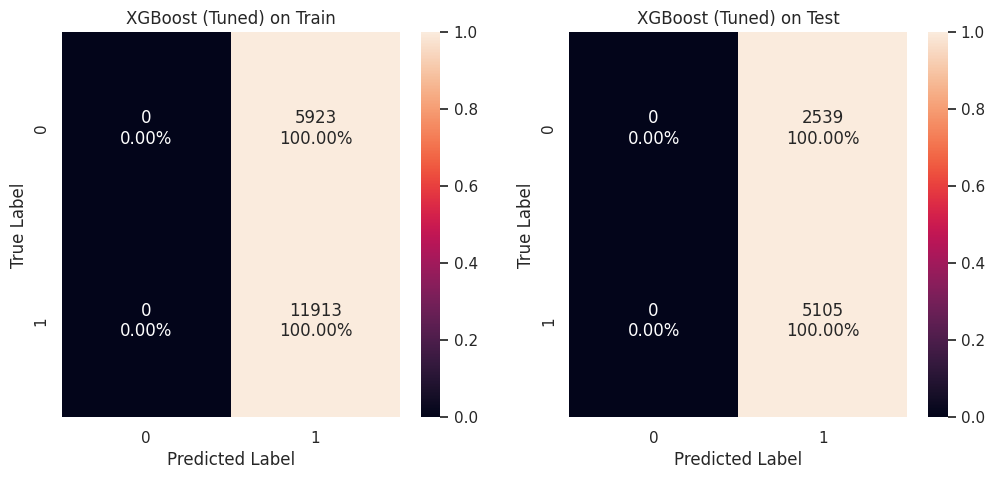

In [ ]:
#Generate and print confusion matrices for train and test sets
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

#Call confusion matrix on train set (left plot)
confusion_matrix_sklearn(xgb_tuned, X_train, y_train, ax=axes[0])
axes[0].set_title('XGBoost (Tuned) on Train');

#Call confusion matrix function on test set (right plot)
confusion_matrix_sklearn(xgb_tuned, X_test, y_test, ax=axes[1])
axes[1].set_title('XGBoost (Tuned) on Test');

In [ ]:
xgb_tuned_perf = model_perf_clf_sklearn(xgb_tuned)
print('XGBoost (Tuned) Performance:')
xgb_tuned_perf

XGBoost (Tuned) Performance:


,Train Accuracy,Test Accuracy,Train Recall,Test Recall,Train Precision,Test Precision,Train F1,Test F1
0,0.668,0.668,1.000,1.000,0.668,0.668,0.801,0.801


- Tuning the hyperparameters of the XGBoost model caused the model to compromise its ability to accurately detect denied cases in the test set.

####**Stacking Classifier**
- A stacking classifier will be built using the following estimators:
  - Base estimators:
    - Decision Tree (with default parameters)
    - GradientBoosting Classifier (Default)
    - XGBoosting (Default)
  - Final estimator:
    - Random Forest Estimator (Tuned)

In [ ]:
estimators = [
    ('Decision Tree', DecisionTreeClassifier(random_state=1)),
    ('GradientBoosting Classifier (Default)', gbc),
    ('XGBoosting (Default)', xgb),
]

final_estimator = rf_estimator_tuned

#Training stacking classifier
stacking_clf = StackingClassifier(estimators = estimators, final_estimator = final_estimator)
stacking_clf.fit(X_train, y_train)

StackingClassifier(estimators=[('Decision Tree',
                                DecisionTreeClassifier(random_state=1)),
                               ('GradientBoosting Classifier (Default)',
                                GradientBoostingClassifier(random_state=1)),
                               ('XGBoosting (Default)',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              device=None,
                                              early_stopping_round...
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None,
                                              max_depth=None, max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=None, n_jobs=None,
                                              num_parallel_tree=None,
                                              random_state=1, ...))],
                   final_estimator=RandomForestClassifier(max_samples=0.4,
                                                          min_samples_leaf=3,
                                                          n_estimators=110,
                                                          random_state=1))

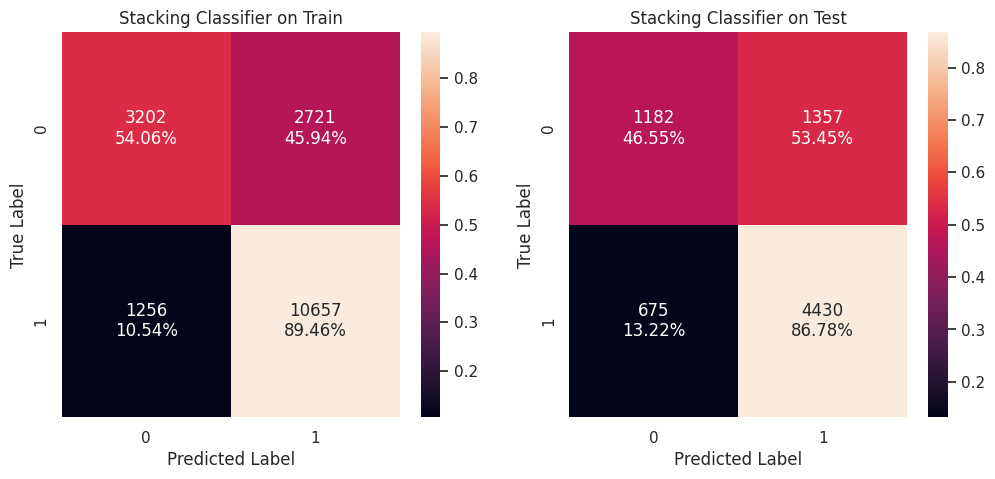

In [ ]:
#Generate and print confusion matrices for train and test sets
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

#Call confusion matrix on train set (left plot)
confusion_matrix_sklearn(stacking_clf, X_train, y_train, ax=axes[0])
axes[0].set_title('Stacking Classifier on Train');

#Call confusion matrix function on test set (right plot)
confusion_matrix_sklearn(stacking_clf, X_test, y_test, ax=axes[1])
axes[1].set_title('Stacking Classifier on Test');

In [ ]:
stacking_clf_perf = model_perf_clf_sklearn(stacking_clf)
print('Stacking Classifier Performance:')
stacking_clf_perf

Stacking Classifier Performance:


,Train Accuracy,Test Accuracy,Train Recall,Test Recall,Train Precision,Test Precision,Train F1,Test F1
0,0.777,0.734,0.895,0.868,0.797,0.766,0.843,0.813


- This stacking classifier has similar predicting abilities to previous models.
- It can accurately predict ~87% of true approval cases but misclassifies 53% of denied cases in the test set.

####**Stacking Classifier #2**
- A second stacking classifier will be built using the following estimators:
  - Base estimators:
    - Gradient Boosting classifier (Default)
    - AdaBoost classifier (Default)
    - Random Forest classifier (Tuned)
  - Final estimator:
    - XGBoost (Default)

In [ ]:
estimators = [
    ('Gradient Boosting Clf (Default)', gbc),
    ('AdaBoostClf (Default)', abc),
    ('Random Forest (Tuned)', rf_estimator_tuned)
 ]

final_estimator = xgb

#Training stacking classifier
stacking_clf_2 = StackingClassifier(estimators = estimators, final_estimator = final_estimator)
stacking_clf_2.fit(X_train, y_train)

StackingClassifier(estimators=[('Gradient Boosting Clf (Default)',
                                GradientBoostingClassifier(random_state=1)),
                               ('AdaBoostClf (Default)',
                                AdaBoostClassifier(random_state=1)),
                               ('Random Forest (Tuned)',
                                RandomForestClassifier(max_samples=0.4,
                                                       min_samples_leaf=3,
                                                       n_estimators=110,
                                                       random_state=1))],
                   final_estimator=XGBClassifier(base_score=None, booster=None,
                                                 callback...
                                                 feature_types=None, gamma=None,
                                                 grow_policy=None,
                                                 importance_type=None,
                                                 interaction_constraints=None,
                                                 learning_rate=None,
                                                 max_bin=None,
                                                 max_cat_threshold=None,
                                                 max_cat_to_onehot=None,
                                                 max_delta_step=None,
                                                 max_depth=None,
                                                 max_leaves=None,
                                                 min_child_weight=None,
                                                 missing=nan,
                                                 monotone_constraints=None,
                                                 multi_strategy=None,
                                                 n_estimators=None, n_jobs=None,
                                                 num_parallel_tree=None,
                                                 random_state=1, ...))

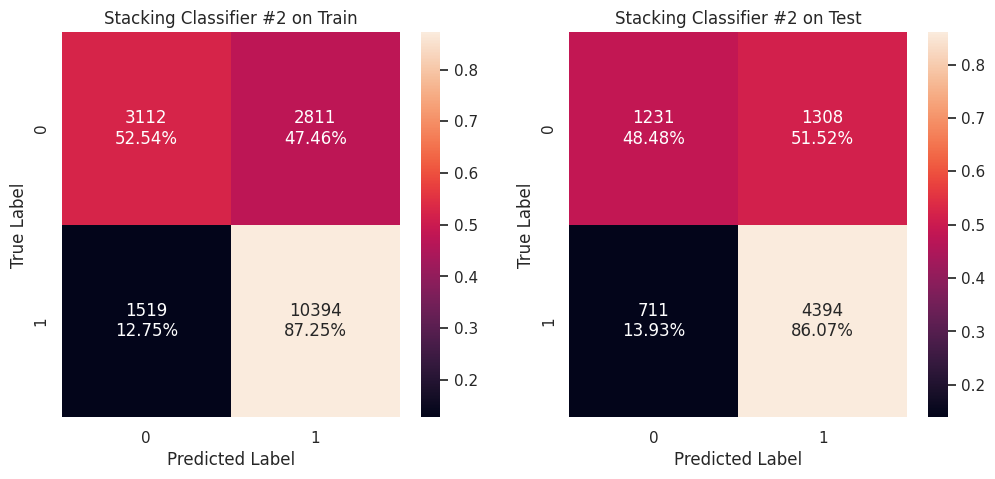

In [ ]:
#Generate and print confusion matrices for train and test sets
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

#Call confusion matrix on train set (left plot)
confusion_matrix_sklearn(stacking_clf_2, X_train, y_train, ax=axes[0])
axes[0].set_title('Stacking Classifier #2 on Train');

#Call confusion matrix function on test set (right plot)
confusion_matrix_sklearn(stacking_clf_2, X_test, y_test, ax=axes[1])
axes[1].set_title('Stacking Classifier #2 on Test');

In [ ]:
stacking_clf_2_perf = model_perf_clf_sklearn(stacking_clf_2)
print('Stacking Classifier #2 Performance:')
stacking_clf_2_perf

Stacking Classifier #2 Performance:


,Train Accuracy,Test Accuracy,Train Recall,Test Recall,Train Precision,Test Precision,Train F1,Test F1
0,0.757,0.736,0.872,0.861,0.787,0.771,0.828,0.813


- This model's performance shows no significant improvement in comparison to the previous stacking classifier.

## **Model Performance Comparison and Conclusions**

In [ ]:
#Concatenate perfromance data frames
perf_df = pd.concat([bagging_estimator_perf, bagging_estimator_tuned_perf, rf_estimator_perf, rf_estimator_tuned_perf, abc_perf, abc_tuned_perf, gbc_perf, gbc_tuned_perf, xgb_perf, xgb_tuned_perf, stacking_clf_perf, stacking_clf_2_perf,])

#Reset the index and drop the old one
perf_df.reset_index(drop=True, inplace=True)

#Replace index values with model names
perf_df = perf_df.rename(index={0: 'Bagging Classifier (Default)', 1: 'Bagging Classifier (Tuned)', 2: 'Random Forest Clf (Default)', 3: 'Random Forest Clf (Tuned)', 4: 'AdaBoost Clf (Default)', 5: 'AdaBoost Clf (Tuned)', 6: 'Gradient Boosting Clf (Default)', 7: 'Gradient Boosting Clf (Tuned)', 8: 'XGBoost (Default)', 9: 'XGBoost (Tuned)', 10: 'Stacking Clf', 11: 'Stacking Clf #2'})
perf_df

,Train Accuracy,Test Accuracy,Train Recall,Test Recall,Train Precision,Test Precision,Train F1,Test F1
Bagging Classifier (Default),0.979,0.688,0.980,0.763,0.989,0.768,0.984,0.765
Bagging Classifier (Tuned),0.668,0.668,1.000,1.000,0.668,0.668,0.801,0.801
Random Forest Clf (Default),0.998,0.700,0.999,0.805,0.998,0.761,0.999,0.782
Random Forest Clf (Tuned),0.784,0.742,0.899,0.871,0.802,0.772,0.848,0.818
AdaBoost Clf (Default),0.738,0.734,0.888,0.887,0.760,0.757,0.819,0.817
AdaBoost Clf (Tuned),0.713,0.707,0.932,0.931,0.720,0.715,0.812,0.809
Gradient Boosting Clf (Default),0.755,0.745,0.878,0.875,0.782,0.773,0.828,0.821
Gradient Boosting Clf (Tuned),0.679,0.681,0.994,0.993,0.677,0.678,0.805,0.806
XGBoost (Default),0.828,0.731,0.922,0.856,0.838,0.767,0.878,0.809
XGBoost (Tuned),0.668,0.668,1.000,1.000,0.668,0.668,0.801,0.801


###  **Evaluation of Models**

Hyperparameter Tuning:
- In general, hyperparameter tuning did not seem to improve model performance in reference to the business objective. Most hypertuned models obtained high recall scores by classifying most, if not all, cases as the certified class. This means that most cases likely to be denied would end up in the shortlist pool, failing to address the original problem.
- The only model that seemed to have improved with hyperparameter tuning is the random forest classifier.
- Due to this, out of the hypertuned models, only the hypertuned random classifier will be considered for final model selection.

In [ ]:
#Concatenate perfromance data frames
final_perf_df = pd.concat([bagging_estimator_perf, rf_estimator_perf, rf_estimator_tuned_perf, abc_perf, gbc_perf, xgb_perf, stacking_clf_perf, stacking_clf_2_perf,])

#Reset the index and drop the old one
final_perf_df.reset_index(drop=True, inplace=True)

#Replace index values with model names
final_perf_df = final_perf_df.rename(index={0: 'Bagging Classifier (Default)', 1: 'Random Forest Clf (Default)', 2: 'Random Forest Clf (Tuned)', 3: 'AdaBoost Clf (Default)', 4: 'Gradient Boosting Clf (Default)', 5: 'XGBoost (Default)', 6: 'Stacking Clf', 7: 'Stacking Clf #2'})
final_perf_df

,Train Accuracy,Test Accuracy,Train Recall,Test Recall,Train Precision,Test Precision,Train F1,Test F1
Bagging Classifier (Default),0.979,0.688,0.980,0.763,0.989,0.768,0.984,0.765
Random Forest Clf (Default),0.998,0.700,0.999,0.805,0.998,0.761,0.999,0.782
Random Forest Clf (Tuned),0.784,0.742,0.899,0.871,0.802,0.772,0.848,0.818
AdaBoost Clf (Default),0.738,0.734,0.888,0.887,0.760,0.757,0.819,0.817
Gradient Boosting Clf (Default),0.755,0.745,0.878,0.875,0.782,0.773,0.828,0.821
XGBoost (Default),0.828,0.731,0.922,0.856,0.838,0.767,0.878,0.809
Stacking Clf,0.777,0.734,0.895,0.868,0.797,0.766,0.843,0.813
Stacking Clf #2,0.757,0.736,0.872,0.861,0.787,0.771,0.828,0.813


Top Performing Models:
- The Gradient Boosting Model with default parameters and Random Forest Classifier (Tuned) have the same performance metrics on the test set. Both can accurately predict 87% of the true positive cases (certified status) and 48% of the true negative cases (denied status) on the test set. The main difference between these models is that the gradient boosting classifier does not overfit the training data as much as the random forest classifier.
- The AdaBoost classifier with default parameters also yielded good performance metrics on the test set. Its recall score on the test set was 89%, meaning it can accurately predict 89% of truly positive cases on the test set. In addition, it can accurately identify 43% of denied cases in the test set. This model generalizes very well.

The importances of these top models will be reviewed in the next section.

###**Model Importances (of top 3 models)**


####**Importances of Gradient Boosting Model with Default Parameters**

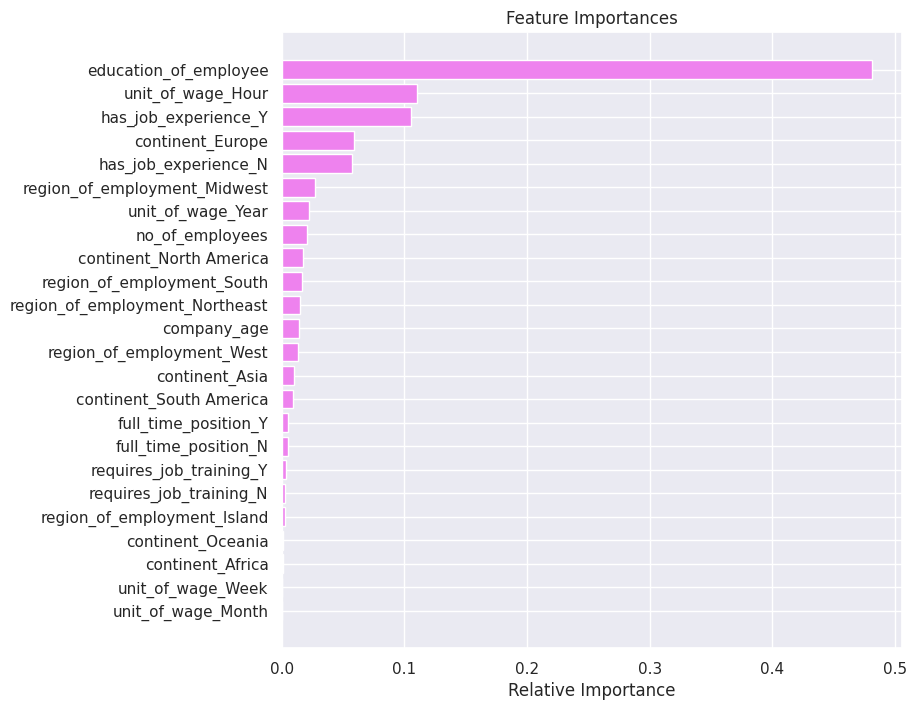

In [ ]:
importances = gbc.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(8,8))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

- This model places the most significance on education of the employee, followed by hourly unit of wage and having job experience.

####**Importances of Random Forest Classifier with Hypertuned Parameters**

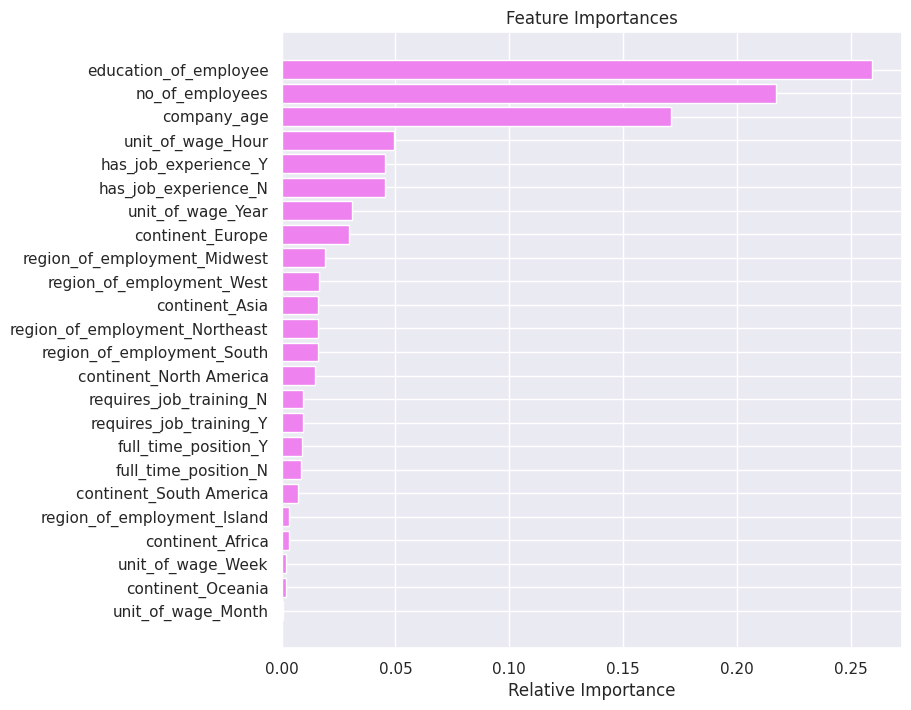

In [ ]:
importances = rf_estimator_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(8,8))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

- This model found that education of employee, number of employees and company age are the strongest predictors for identifying the approval status of a case.

####**Importances of AdaBoost Model with Default Parameters**

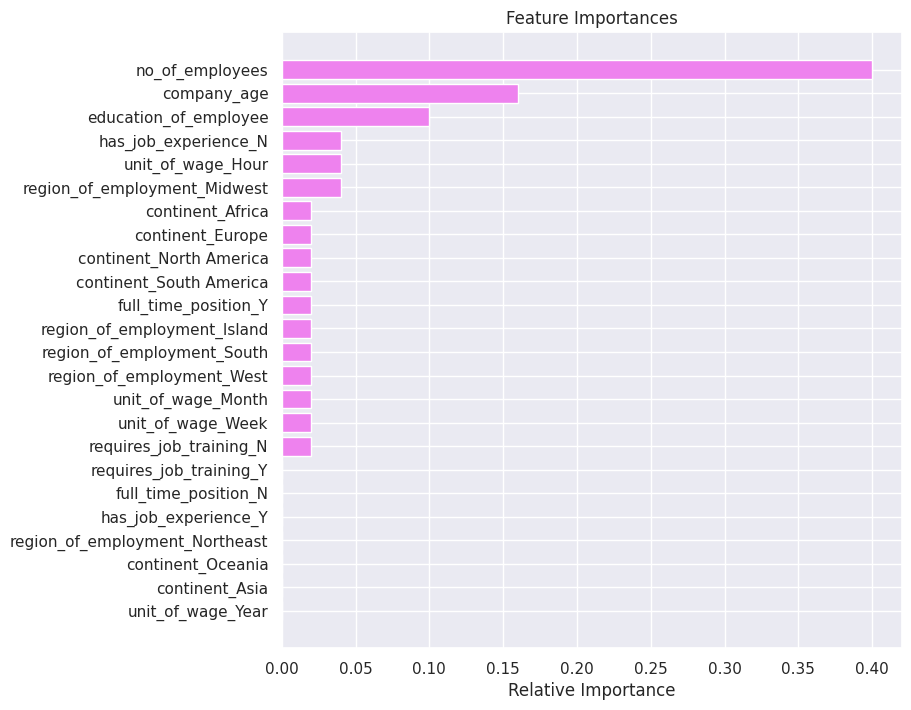

In [ ]:
importances = abc.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(8,8))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

- The AdaBoost classifier with default parameters also found that number of employees, company age and education of the employee are strong predictors of case status.

###**Selection of a Model**
  - The Gradient Boosting Classifier will best serve the purpose of the business objective since it has a good recall score of 87%. The breakdown of this model's performance is as follows:
    - It can accurately predict 87% of approved cases in the test set. Thus, 87% of applications that are likely to be approved can be shortlisted and processed more efficiently.
    - In addition, it can accurately predict 48% of the denied cases in the test set.
    - This model generalizes well across training and test sets.

## **Actionable Insights and Recommendations**

###**Insights**

- Overall, it was decided that the Gradient Boosting Classifier had the best performance on the dataset. It should be noted however, that all models can still be modified for further improvement via hyperparameter tuning or by focusing on maximizing a performance metric other than recall score.
- Maximizing recall score was chosen because of its emphasis on correctly identifying cases that are likely to get approved. This will help in the effort to make the screening and approval process more efficient, especially since 67% of the cases in the dataset were certified.
- The F1 score can also be considered in an effort to prioritize accurately identifying cases with high denial likelihood. Correctly predicting such cases will lead to a more efficient review process by potentially reducing the volume of applications that get streamlined into the shortlist pool.
- There were common features among the top performing models that were deemed to be strong predictors of case status. The features are as follows:
  - Education of employee was the most important feature in the gradient boosting classifier with default parameters, random forest classifier with hypertuned parameters and in the adaboost classifier with default parameters.
  - Company age and number of employees were second and third most important features for the random forest classifier (hypertuned) and the adaboost classifer with default parameters.
  - Hourly unit of wage and having job experience were also important features in the gradient boosting classifier with default parameters.


###**Recommendations**

1. The Office of Foreign Labor Certification can create departments that specialize in certain application types. Similar to current efforts of shortlisting candidates that have high chances of approval, we can channel applications that have high chances of denial into another sector. This will make the reviewal of applications more efficient.
2. Education of employee was the number one important feature among the top 3 performing models. It was also discovered in the EDA section that as a candidate's level of education increased, the likelihood of their application getting approved also increased.
  - The data showed that candidates with a high school level of education made up 13% of all applications and had the highest likelihood of denial. In an effort to reduce the volume of cases that are likely to get denied, OFLC can eliminate the possibility of applying for a visa if the candidate only has a high school level of education.
  - On the contrary, candidates with a doctorate degree had higher chances of getting their visas approved. Thus, candidates with doctorate degrees can be shortlisted into the sector of applications with high approval odds.

3. Number of employees was another important feature for two of the top performing classifiers. This is also supported by the findings that certified cases have a slightly higher median number of employees at their company compared to denied cases.
  - If a company has a large number of employees, than it can be flagged as likely to be approved, with consideration of other features.
4. Company age was deemed an important feature for two of the top models, however the data showed that no strong correlation between company age and case status existed. The only findings were that denied cases had the highest distribution when the company age was around 20 years old and that certified cases had the highest distribution when the company was around 10 years old.
  - This information can be used in conjunction with other features that will help predict the approval status of an application.
5. Profile of applications likely to get approved if:
  - The candidate's continent of origin is Africa or Europe.
  - The candidate has a higher level of education, specifically a Master's or Doctorate degree.
  - The candidate has job experience.
  - The applicant has a yearly unit of wage.
6. Profile of applications likely to get denied if:
  - The candidate's continent of origin is South America.
  - The candidate has a lower level of education, specifically a high school diploma.
  - The candidate does not have job experience.
  - The applicant has an hourly unit of wage.
The mentioned profiles and features can help make the application review process more efficient.

In [ ]:
!jupyter nbconvert --execute --to html '/content/DSBA_Project_ET_EasyVisa_Fullcode.ipynb'

[NbConvertApp] Converting notebook /content/DSBA_Project_ET_EasyVisa_Fullcode.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 47 image(s).
[NbConvertApp] Writing 3725986 bytes to /content/DSBA_Project_ET_EasyVisa_Fullcode.html
